In [16]:
#ylabel
timelabel = "Time (yyyy-MM-dd hh:mm:ss)"
barolabel = "Baro. (mb)"
altlabel = "Altitude (Meters)"
templabel = "Temp (Celsius)"
windspeedlabel = "Wind Speed (m/s)"
magdirlabel = "Mag. Dir. (Degrees)"

In [ ]:
from moviepy.editor import *

foo = "./test/"

names = [(foo + str(i) + ".png") for i in range(11)]

fps = (len(names))
fps = (fps) / (fps * 2)
fps

clip = ImageSequenceClip(names, fps = fps, with_mask=True)
clip.set_opacity(0)
clip.write_videofile("movie.mp4", fps=fps)
#clip.write_gif("test.gif", fps=fps)

In [ ]:
import os

os.getcwd()

## Aeropod Kestrel

In [2]:
#TYPE IN FILE NAME HERE
aeropodkestrelfile = "./AEROPOD PREPROCESSED.csv"

#################################################################
try:
    print(f"Opening file: {aeropodkestrelfile}")   
    f1 = open(aeropodkestrelfile, "r")
    print("File opened successfully")
    
except Exception as e:
    print("Something went wrong")
    print(e)

Opening file: ./AEROPOD PREPROCESSED.csv
File opened successfully


## Ground Kestrel

In [3]:
groundkestrelfile = "./GROUND KESTREL TRIM.csv"
try:
    print(f"Opening file: {groundkestrelfile}")   
    f2 = open(groundkestrelfile, "r")
    print("File opened successfully")
    
except Exception as e:
    print("Something went wrong")
    print(e)

Opening file: ./GROUND KESTREL TRIM.csv
File opened successfully


## Obtaining the AEROPOD measurements

In [4]:
#Run this cell once
print("FOO")
import pandas as pd
print("BAR")
try:
    #Obtaining headers and units
    print("Obtaining headers for AEROPOD")
    headers_aeropod = f1.readline().split(",")
    headers_aeropod[-1] = (headers_aeropod[-1].split("\n"))[0] #Get rid of the \n in the last entry
    print("Headers successfully obtained")
    print(headers_aeropod)

    df_aeropod = pd.read_csv(f1, names=headers_aeropod)
    print("AEROPOD data obtained successfully")
    f1.close()

except Exception as e:
    print("Something went wrong")
    print(e)

FOO
BAR
Obtaining headers for AEROPOD
Headers successfully obtained
['Time (yyyy-MM-dd hh:mm:ss)', 'Sampling Interval (seconds)', 'Temp (Celsius)', 'Wet Bulb Temp. (Celsius)', 'Rel. Hum. (%)', 'Baro. (mb)', 'Altitude (Meters)', 'Altitude Baseline (Meters)', 'AOG (Meters)', 'Station P. (mb)', 'Wind Speed (m/s)', 'Heat Index (Celsius)', 'Dew Point (Celsius)', 'Dens. Alt. (Meters)', 'Crosswind (m/s)', 'Headwind (m/s)', 'Mag. Dir. (Degrees)', 'True Dir. (Degrees)', 'Wind Chill (Celsius)']
AEROPOD data obtained successfully


## Obtaining the GROUND Kestrel measurements

In [5]:
#Run this cell once
import pandas as pd
try:
    #Obtaining headers and units
    print("Obtaining headers for GROUND Kestrel")
    headers_ground = f2.readline().split(",")
    headers_ground[-1] = (headers_ground[-1].split("\n"))[0] #Get rid of the \n in the last entry
    print("Headers successfully obtained")
    print(headers_ground)

    df_ground = pd.read_csv(f2, names=headers_ground)
    print("GROUND KESTREL data obtained successfully")
    f2.close()
except Exception as e:
    print("Something went wrong")
    print(e)

Obtaining headers for GROUND Kestrel
Headers successfully obtained
['Time (yyyy-MM-dd hh:mm:ss)', 'Elapsed Time (seconds)', 'Sampling Interval (seconds)', 'Temp (Celsius)', 'Wet Bulb Temp. (Celsius)', 'Rel. Hum. (%)', 'Baro. (mb)', 'Altitude (Meters)', 'Station P. (mb)', 'Wind Speed (m/s)', 'Heat Index (Celsius)', 'Dew Point (Celsius)', 'Dens. Alt. (Meters)', 'Crosswind (m/s)', 'Headwind (m/s)', 'Mag. Dir. (Degrees)', 'True Dir. (Degrees)', 'Wind Chill (Celsius)']
GROUND KESTREL data obtained successfully


## Preview AEROPOD data


In [6]:
#Run this cell once
df_aeropod[df_aeropod.columns[0]] = pd.to_datetime(df_aeropod[df_aeropod.columns[0]])
display(df_aeropod)
display(df_aeropod.dtypes)

,Time (yyyy-MM-dd hh:mm:ss),Sampling Interval (seconds),Temp (Celsius),Wet Bulb Temp. (Celsius),Rel. Hum. (%),Baro. (mb),Altitude (Meters),Altitude Baseline (Meters),AOG (Meters),Station P. (mb),Wind Speed (m/s),Heat Index (Celsius),Dew Point (Celsius),Dens. Alt. (Meters),Crosswind (m/s),Headwind (m/s),Mag. Dir. (Degrees),True Dir. (Degrees),Wind Chill (Celsius)
0,2022-11-05 13:21:40,2.0,23.9,19.0,63.3,1019.7,-55,-55,0,1019.7,3.2,24.0,16.4,320,2.7,-1.7,120,121,23.8
1,2022-11-05 13:21:42,2.0,23.9,19.0,63.2,1019.5,-55,-55,0,1019.6,3.3,24.0,16.4,322,2.8,-1.7,120,121,23.8
2,2022-11-05 13:21:44,2.0,23.8,18.9,63.2,1019.7,-55,-55,0,1019.7,3.4,24.0,16.4,320,2.3,-2.5,134,135,23.8
3,2022-11-05 13:21:46,2.0,23.9,19.0,63.2,1019.5,-55,-55,0,1019.6,2.9,24.0,16.4,322,2.7,-1.2,119,119,23.8
4,2022-11-05 13:21:48,2.0,23.9,19.0,63.1,1019.7,-55,-55,0,1019.7,2.8,24.0,16.4,321,1.6,-2.3,151,152,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2022-11-05 13:38:56,2.0,24.6,19.3,61.7,1019.5,-54,-55,1,1019.5,3.3,24.6,16.7,350,3.1,-1.3,242,242,24.5
519,2022-11-05 13:38:58,2.0,24.6,19.4,61.8,1019.5,-54,-55,1,1019.6,3.0,24.6,16.8,349,2.8,1.2,40,41,24.5
520,2022-11-05 13:39:00,2.0,24.7,19.5,62.0,1019.5,-54,-55,1,1019.6,2.0,24.7,16.9,352,1.4,1.5,36,37,24.6
521,2022-11-05 13:39:02,2.0,24.8,19.6,62.2,1019.5,-54,-55,1,1019.5,2.6,24.9,17.1,359,1.8,1.9,41,42,24.8


Time (yyyy-MM-dd hh:mm:ss)     datetime64[ns]
Sampling Interval (seconds)           float64
Temp (Celsius)                        float64
Wet Bulb Temp. (Celsius)              float64
Rel. Hum. (%)                         float64
Baro. (mb)                            float64
Altitude (Meters)                       int64
Altitude Baseline (Meters)              int64
AOG (Meters)                            int64
Station P. (mb)                       float64
Wind Speed (m/s)                      float64
Heat Index (Celsius)                  float64
Dew Point (Celsius)                   float64
Dens. Alt. (Meters)                     int64
Crosswind (m/s)                       float64
Headwind (m/s)                        float64
Mag. Dir. (Degrees)                     int64
True Dir. (Degrees)                     int64
Wind Chill (Celsius)                  float64
dtype: object

## Preview GROUND Kestrel data


In [7]:
#Run this cell once
df_ground[df_ground.columns[0]] = pd.to_datetime(df_ground[df_ground.columns[0]])
display(df_ground)
display(df_ground.dtypes)

,Time (yyyy-MM-dd hh:mm:ss),Elapsed Time (seconds),Sampling Interval (seconds),Temp (Celsius),Wet Bulb Temp. (Celsius),Rel. Hum. (%),Baro. (mb),Altitude (Meters),Station P. (mb),Wind Speed (m/s),Heat Index (Celsius),Dew Point (Celsius),Dens. Alt. (Meters),Crosswind (m/s),Headwind (m/s),Mag. Dir. (Degrees),True Dir. (Degrees),Wind Chill (Celsius)
0,2022-11-05 13:21:40,0.0,2.0,23.9,19.7,68.4,1020.7,-64,1020.8,2.7,24.2,17.7,316,0.5,-2.7,170,170,23.8
1,2022-11-05 13:21:42,2.0,2.0,23.9,19.7,68.4,1020.7,-63,1020.7,2.4,24.2,17.7,318,0.4,-2.4,170,170,23.8
2,2022-11-05 13:21:44,4.0,2.0,23.9,19.8,68.4,1020.7,-64,1020.7,1.5,24.3,17.8,319,0.3,-1.5,170,170,23.9
3,2022-11-05 13:21:46,6.0,2.0,23.9,19.8,68.4,1020.7,-63,1020.7,1.0,24.3,17.8,320,0.2,-1.0,170,170,23.9
4,2022-11-05 13:21:48,8.0,2.0,24.0,19.8,68.4,1020.7,-63,1020.7,1.0,24.4,17.8,322,0.2,-1.0,170,170,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2022-11-05 13:38:56,1036.0,2.0,24.8,21.9,77.6,1020.5,-63,1020.6,3.7,25.9,20.6,367,0.8,-3.6,192,192,24.8
519,2022-11-05 13:38:58,1038.0,2.0,24.9,21.9,77.6,1020.5,-63,1020.5,3.2,26.1,20.7,372,0.7,-3.1,192,192,24.9
520,2022-11-05 13:39:00,1040.0,2.0,25.0,22.1,77.5,1020.5,-62,1020.5,2.7,26.3,20.8,376,0.6,-2.6,192,192,25.0
521,2022-11-05 13:39:02,1042.0,2.0,25.1,22.1,77.5,1020.5,-62,1020.5,3.1,26.5,20.9,379,0.6,-3.0,189,189,25.1


Time (yyyy-MM-dd hh:mm:ss)     datetime64[ns]
Elapsed Time (seconds)                float64
Sampling Interval (seconds)           float64
Temp (Celsius)                        float64
Wet Bulb Temp. (Celsius)              float64
Rel. Hum. (%)                         float64
Baro. (mb)                            float64
Altitude (Meters)                       int64
Station P. (mb)                       float64
Wind Speed (m/s)                      float64
Heat Index (Celsius)                  float64
Dew Point (Celsius)                   float64
Dens. Alt. (Meters)                     int64
Crosswind (m/s)                       float64
Headwind (m/s)                        float64
Mag. Dir. (Degrees)                     int64
True Dir. (Degrees)                     int64
Wind Chill (Celsius)                  float64
dtype: object

# Plot formatting testing

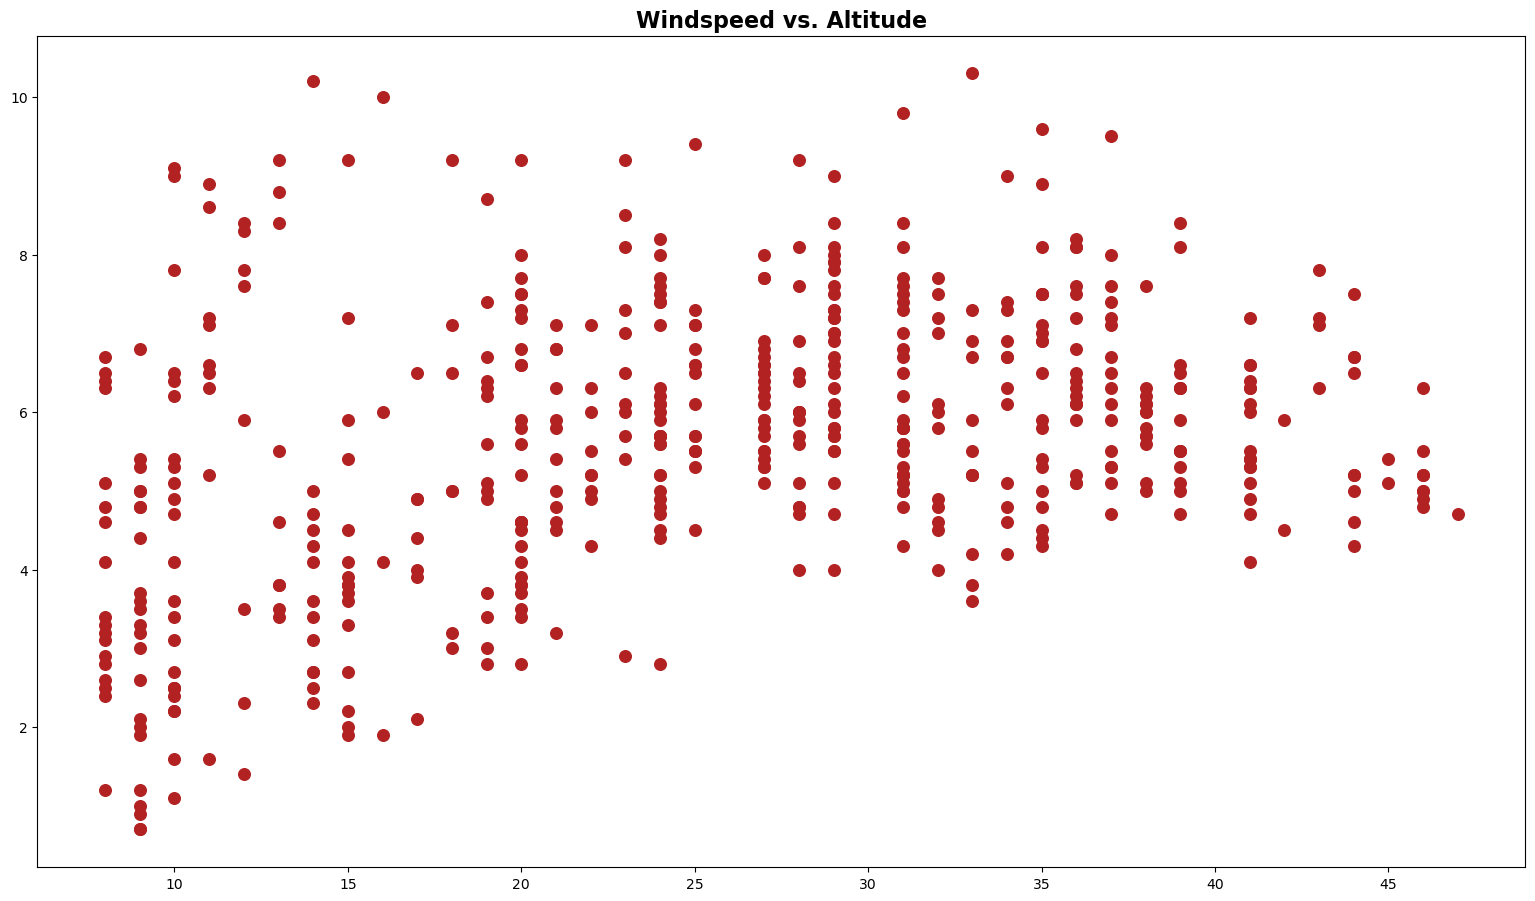

In [90]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

df = df_aeropod

time = df[df.columns[0]]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df[altlabel] + 63
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

##########################################################################################
plt.style.use("default")
fig, axs = plt.subplots(figsize = (19.2, 10.8))


axs.scatter(alt, windspeed, color="firebrick", s=70)


axs.set_title("Windspeed vs. Altitude", fontweight="bold", fontsize=16)

plt.show()

## Multiple y axes
- https://matplotlib.org/stable/gallery/spines/multiple_yaxis_with_spines.html

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

df = df_ground

time = df[df.columns[0]]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df[altlabel] + 63
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

##########################################################################################
plt.style.use("default")
fig = plt.figure(figsize = (19.2, 10.8))
fig.suptitle("GROUND KESTREL", fontweight = "bold", fontsize = 20)

plt.plot(time, alt, color="firebrick", label="Altitude (Meters)")
plt.plot(time, windspeed, color="blue", label="Windspeed (m/s)")

#axs.plot(time, magdir, color="orange", label="Mag. Dir. (Degrees)")

foo = fig.get_axes()
ax2 = foo[0].twinx()
ax3 = foo[0].twinx()

ax2.plot(time, magdir, color="orange", label="Mag. Dir. (Degrees)")
ax2.tick_params(axis="y", labelcolor="orange")

ax3.spines.right.set_position(("axes", 1.05))
ax3.plot(time, temp, color="green", label="Temperature (Celsius)")
ax3.tick_params(axis="y", labelcolor="green")

time_min = time.min()
time_max = time.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

axs.xaxis.set_major_formatter(date_format)
#axs.set_xlim(time_min, time_max)

fig.legend(loc="upper right")

plt.xticks(time[0::50], fontweight="bold")


plt.show()

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

df = df_aeropod

time = df[df.columns[0]]
time2 = pd.to_numeric(time) / 10000000000000000

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df[altlabel] + 63
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

##########################################################################################
plt.style.use("fivethirtyeight")   
fig = plt.figure(figsize = (19.2,10.8))
fig.suptitle("AEROPOD", fontweight = "bold", fontsize = 20)

alt = df_aeropod["AOG (Meters)"]
alty = []

ticks = time[0::50]
timewindow_range = (ticks.iat[1] - ticks.iat[0]) / 2

#Formattting
plt.grid(visible=True)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(ticks, fontweight = "bold")

time_min = time.min()
time_max = time.max()        
plt.xlim(time_min, time_max)
#plt.ylim(ymin, ymax) #ymin and ymax
plt.yticks(fontsize = 30)
#plt.ylabel(color = color, fontsize = 30) #ylabel

#PLOTTING THE VALUES
plt.plot(time, alt, color="firebrick", alpha=.2, label=altlabel)
plt.plot(time[:200], alt[:200], color="firebrick", label=altlabel)

half = len(time)/2
half = int(half)

#Time indicator
y = alt[half]
currenttime = time[half].strftime(f"%I:%M:%S %p\n{y} meters")

x_0 = ticks.iat[0]
x_i = ticks.iat[4]
timewindow_lower_start = x_0 - (timewindow_range)
timewindow_upper_start = x_0 + (timewindow_range)

timewindow_lower_mid = x_i - (timewindow_range)
timewindow_upper_mid = x_i + (timewindow_range)

plt.annotate(currenttime, xy=(time[0],y), xytext= (time[0+20],y), arrowprops=dict(facecolor="black"), fontweight="bold")
plt.axvline(x=x_0, color="green", linewidth=4)
foo = plt.axvspan(xmin=timewindow_lower_start, xmax=timewindow_upper_start, ymin=0, ymax=1,alpha=0.5)

plt.axvspan(xmin=timewindow_lower_mid, xmax=timewindow_upper_mid, ymin=0, ymax=1,alpha=0.5) #API Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html

#Ghost line tracer
plt.axvline(x=x_i, color="green", linewidth=4)

#plt.text(time[half], 40, currenttime, fontweight="bold", fontsize=20)

#Shading under curve
plt.vlines(time, 0, alt, linewidths = 1.3, alpha=0.3, linestyles="solid")


plt.legend(loc="upper right", labelcolor="black")

In [ ]:
foo.get_xy()

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

#yvalue
temp_aeropod = df_aeropod[templabel]
baro_aeropod = df_aeropod[barolabel]
alt_aeropod = df_aeropod["AOG (Meters)"]
windspeed_aeropod = df_aeropod[windspeedlabel]
magdir_aeropod = df_aeropod[magdirlabel]

temp_ground = df_ground[templabel]
baro_ground = df_ground[barolabel]
windspeed_ground = df_ground[windspeedlabel]
magdir_ground = df_ground[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

##########################################################################################
plt.style.use("default")
fig = plt.figure(figsize = (19.2, 10.8))
fig.suptitle("Windspeed and Mag. Dir.", fontweight = "bold", fontsize = 20)
plt.xticks(ticks, fontweight = "heavy")

plt.ylabel("Windspeed (m/s)")

l1 = plt.plot(time, windspeed_aeropod, color="purple", label="AEROPOD Windspeed")
#plt.plot(time, magdir_aeropod, color = "darkorange", label="AEROPOD Mag. Dir.")
l2 = plt.plot(time, windspeed_ground, color = "navy", label="GROUND Windspeed")
#plt.plot(time, magdir_ground, color = "darkgoldenrod", label="GROUND Mag. Dir")

foo = fig.get_axes()
ax2 = foo[0].twinx()
#ax3 = foo[0].twinx()

l3 = ax2.plot(time, magdir_aeropod, color="darkorange", label="AEROPOD Mag. Dir.")
l4 = ax2.plot(time, magdir_ground, color = "forestgreen", label="GROUND Mag. Dir")

ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylabel("AEROPOD Mag. Dir. (Degrees)", color="black")

#ax3.tick_params(axis="y", labelcolor="forestgreen")
#ax3.set_ylabel("GROUND Mag. Dir. (Degrees)", color="forestgreen")
#ax3.spines.right.set_position(("axes", 1.05))

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

axs.xaxis.set_major_formatter(date_format)

lns = l1 + l2 + l3 + l4
labels = [l.get_label() for l in lns]

plt.legend(lns, labels, loc="upper right", labelcolor="black")

plt.xticks(time[0::50], fontweight="bold")

plt.show()

# Creating the directories + paths

In [ ]:
from pathlib import Path

#Temp
tempvstimepics = Path("Temp_vs_Time")
tempvstimepics.mkdir(exist_ok = True)
tempvstimepath = "./Temp_vs_Time/AEROPOD/"


#Windspeed
windspeedvstimepics = Path("Windspeed_vs_Time")
windspeedvstimepics.mkdir(exist_ok = True)
windspeedvstimepath = "./Windspeed_vs_Time/AEROPOD/"

#Alt
altvstimepics = Path("Alt_vs_Time")
altvstimepics.mkdir(exist_ok = True)
altvstimepath = "./Alt_vs_Time/"

#Baro
barovstimepics = Path("Baro_vs_Time")
barovstimepics.mkdir(exist_ok = True)
barovstimepath = "./Baro_vs_Time/AEROPOD/"

#Magdir
magdirvstimepics = Path("Magdir_vs_Time")
magdirvstimepics.mkdir(exist_ok = True)
magdirvstimepath = "./Magdir_vs_Time/AEROPOD/"

#Aeropod Superimposed plots
aeropodsuperimposed = Path("AEROPOD SUPERIMPOSED")
aeropodsuperimposed.mkdir(exist_ok = True)
aeropodsuperimposedpath = "./AEROPOD SUPERIMPOSED/"

#Ground Superimposed plots
groundsuperimposed = Path("GROUND SUPERIMPOSED")
groundsuperimposed.mkdir(exist_ok = True)
groundsuperimposedpath = "./GROUND SUPERIMPOSED/"


# Creating the plots

## AEROPOD

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df_aeropod[timelabel]

#yvalue
temp = df_aeropod[templabel]
baro = df_aeropod[barolabel]
alt = df_aeropod[altlabel]
windspeed = df_aeropod[windspeedlabel]
magdir = df_aeropod[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, pic_path):
    start = tm.perf_counter()
    
    plt.style.use("fivethirtyeight")   
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40)

    x = []
    
    alt = df_aeropod["AOG (Meters)"]
    alty = []
    
    temp = df_aeropod[templabel]
    tempy = []
    
    windspeed = df_aeropod[windspeedlabel]
    windspeedy = []
    
    magdir = df_aeropod[magdirlabel]
    magdiry = []
    
    for i in range(len(time)):
        #Formattting
        plt.cla()
        plt.grid(visible=True)    
        plt.xlim(time_min, time_max)
        plt.xticks(time[0::50], fontweight = "bold")
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(fontsize = 30)
        #plt.ylabel(color = color, fontsize = 30) #ylabel
        
        #PREPARING THE PLOT        
        x.append(time[i])
        
        alty.append(alt[i])
        tempy.append(temp[i])
        windspeedy.append(windspeed[i])
        magdiry.append(magdir[i])
        
        #PLOTTING THE VALUES
        plt.plot(x, alty, color="firebrick", label=altlabel)
        plt.plot(x, windspeedy, color="blue", label="Windspeed (m/s)")
        plt.plot(x, tempy, color="green", label="Temperature (Celsius)")
        plt.plot(x, magdiry, color="orange", label=magdirlabel)
        
        plt.legend(loc="upper right", labelcolor="black")

        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=True)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")

animate("AEROPOD", aeropodsuperimposedpath)

##  GROUND KESTREL

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df_ground[timelabel]

#yvalue
temp = df_ground[templabel]
baro = df_ground[barolabel]
alt = df_ground[altlabel] + 63
windspeed = df_ground[windspeedlabel]
magdir = df_ground[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, pic_path):
    start = tm.perf_counter()
  
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", color="black", fontsize = 40)

    x = []
    
    alt = df_ground[altlabel] + 63
    alty = []
    
    temp = df_ground[templabel]
    tempy = []
    
    windspeed = df_ground[windspeedlabel]
    windspeedy = []
    
    magdir = df_ground[magdirlabel]
    magdiry = []
    
    ax2 = ax.twinx()
    
    for i in range(len(time)):
        
        #Formattting
        plt.grid(visible=True)
        
        ax.cla()
        ax2.cla()
        
        ax.tick_params(axis="x", labelcolor="black")
        ax.tick_params(axis="y", labelcolor="black", labelsize=30)
        ax.set_xlim(time_min, time_max)
        ax.set_xticks(ticks=time[0::50], fontweight="bold")

        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        #plt.ylabel(color = color, fontsize = 30) #ylabel
        
        #PREPARING THE PLOT        
        x.append(time[i])
        
        alty.append(alt[i])
        tempy.append(temp[i])
        windspeedy.append(windspeed[i])
        magdiry.append(magdir[i])
        
        #PLOTTING THE VALUES
        l2 = ax.plot(x, alty, color="firebrick", label=altlabel)
        l3 = ax.plot(x, windspeedy, color="blue", label="Windspeed (m/s)")
        l4 = ax.plot(x, tempy, color="green", label="Temperature (Celsius)")
        
        l1 = ax2.plot(x, magdiry, color="orange", label="Mag. Dir. (Degrees)")
        ax2.tick_params(axis="y", labelcolor="orange")
        
        #plt.plot(x, magdiry, color="orange", label=magdirlabel)
        
        #Reference: https://pythonguides.com/matplotlib-two-y-axes/#Matplotlib_two_y_axes_different_scale
        lns = l2 + l3 + l4 + l1
        labels = [l.get_label() for l in lns]
        
        plt.legend(lns, labels, loc="upper right", labelcolor="black") #legend inside the plot
        #fig.legend(lns, labels, loc="upper right") #legend outside the plot
        
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=True)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")

animate("GROUND KESTREL", groundsuperimposedpath)

## Plots separate

In [ ]:
pngs = "./Alt_vs_Time/png/"

## Creating jpegs

In [ ]:
#Re-format the time ticks
#Size 1920 x 1080
#Axis labels
#Plot styles plt.style.use

import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df[df.columns[0]]

#ylabel
barolabel = df.columns[5]
altlabel = df.columns[6]
templabel = df.columns[2]
windspeedlabel = df.columns[10]
magdirlabel = df.columns[14]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df["AOG (Meters)"]
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)

    x = []
    y = []
    
    for i in range(len(time)):
        x.append(time[i]) 
        y.append(yvalue[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        plt.xlim(time_min, time_max)
        plt.xticks(time[0::50], fontweight = "bold")
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(color=color, fontsize = 30)
        #plt.ylabel(color = color, fontsize = 30) #ylabel

        plt.plot(time, alt, color="firebrick", alpha=0.2, label=altlabel)
        plt.plot(x, y, color = color) #color

        path = pic_path + str(i) + ".jpeg" #pic_path
        plt.savefig(path, format="jpeg", transparent=True)
        print(f"{i}.jpeg has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")

#animate("Mag. Dir. (Degrees) vs. Time", magdir, magdirvstimepath, "black")

animate("Altitude (Meters) vs. Time", alt, altvstimepath, "red")

#animate("Barometric Pressure (mb) vs. Time", baro, barovstimepath, "navy")

#animate("Wind Speed (m/s) vs. Time", windspeed, windspeedvstimepath, "green")



## Creating pngs

In [ ]:
#Re-format the time ticks
#Size 1920 x 1080
#Axis labels
#Plot styles plt.style.use

import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df[df.columns[0]]

#ylabel
barolabel = df.columns[5]
altlabel = df.columns[6]
templabel = df.columns[2]
windspeedlabel = df.columns[10]
magdirlabel = df.columns[14]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df["AOG (Meters)"]
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)

    x = []
    y = []
    
    for i in range(len(time)):
        x.append(time[i]) 
        y.append(yvalue[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        plt.xlim(time_min, time_max)
        plt.xticks(time[0::50], fontweight = "bold")
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(color=color, fontsize = 30)
        #plt.ylabel(color = color, fontsize = 30) #ylabel

        plt.plot(time, alt, color="firebrick", alpha=0.2, label=altlabel)
        plt.plot(x, y, color = color) #color

        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=True)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")

#animate("Mag. Dir. (Degrees) vs. Time", magdir, magdirvstimepath, "black")

animate("Altitude (Meters) vs. Time", alt, pngs, "red")

#animate("Barometric Pressure (mb) vs. Time", baro, barovstimepath, "navy")

#animate("Wind Speed (m/s) vs. Time", windspeed, windspeedvstimepath, "green")



# Windspeed vs. Altitude parametric plot

Saving to ./wsvsalt/
0.png has been saved
1.png has been saved
2.png has been saved
3.png has been saved
4.png has been saved
5.png has been saved
6.png has been saved
7.png has been saved
8.png has been saved
9.png has been saved
10.png has been saved
11.png has been saved
12.png has been saved
13.png has been saved
14.png has been saved
15.png has been saved
16.png has been saved
17.png has been saved
18.png has been saved
19.png has been saved
20.png has been saved
21.png has been saved
22.png has been saved
23.png has been saved
24.png has been saved
25.png has been saved
26.png has been saved
27.png has been saved
28.png has been saved
29.png has been saved
30.png has been saved
31.png has been saved
32.png has been saved
33.png has been saved
34.png has been saved
35.png has been saved
36.png has been saved
37.png has been saved
38.png has been saved
39.png has been saved
40.png has been saved
41.png has been saved
42.png has been saved
43.png has been saved
44.png has been saved

361.png has been saved
362.png has been saved
363.png has been saved
364.png has been saved
365.png has been saved
366.png has been saved
367.png has been saved
368.png has been saved
369.png has been saved
370.png has been saved
371.png has been saved
372.png has been saved
373.png has been saved
374.png has been saved
375.png has been saved
376.png has been saved
377.png has been saved
378.png has been saved
379.png has been saved
380.png has been saved
381.png has been saved
382.png has been saved
383.png has been saved
384.png has been saved
385.png has been saved
386.png has been saved
387.png has been saved
388.png has been saved
389.png has been saved
390.png has been saved
391.png has been saved
392.png has been saved
393.png has been saved
394.png has been saved
395.png has been saved
396.png has been saved
397.png has been saved
398.png has been saved
399.png has been saved
400.png has been saved
401.png has been saved
402.png has been saved
403.png has been saved
404.png has

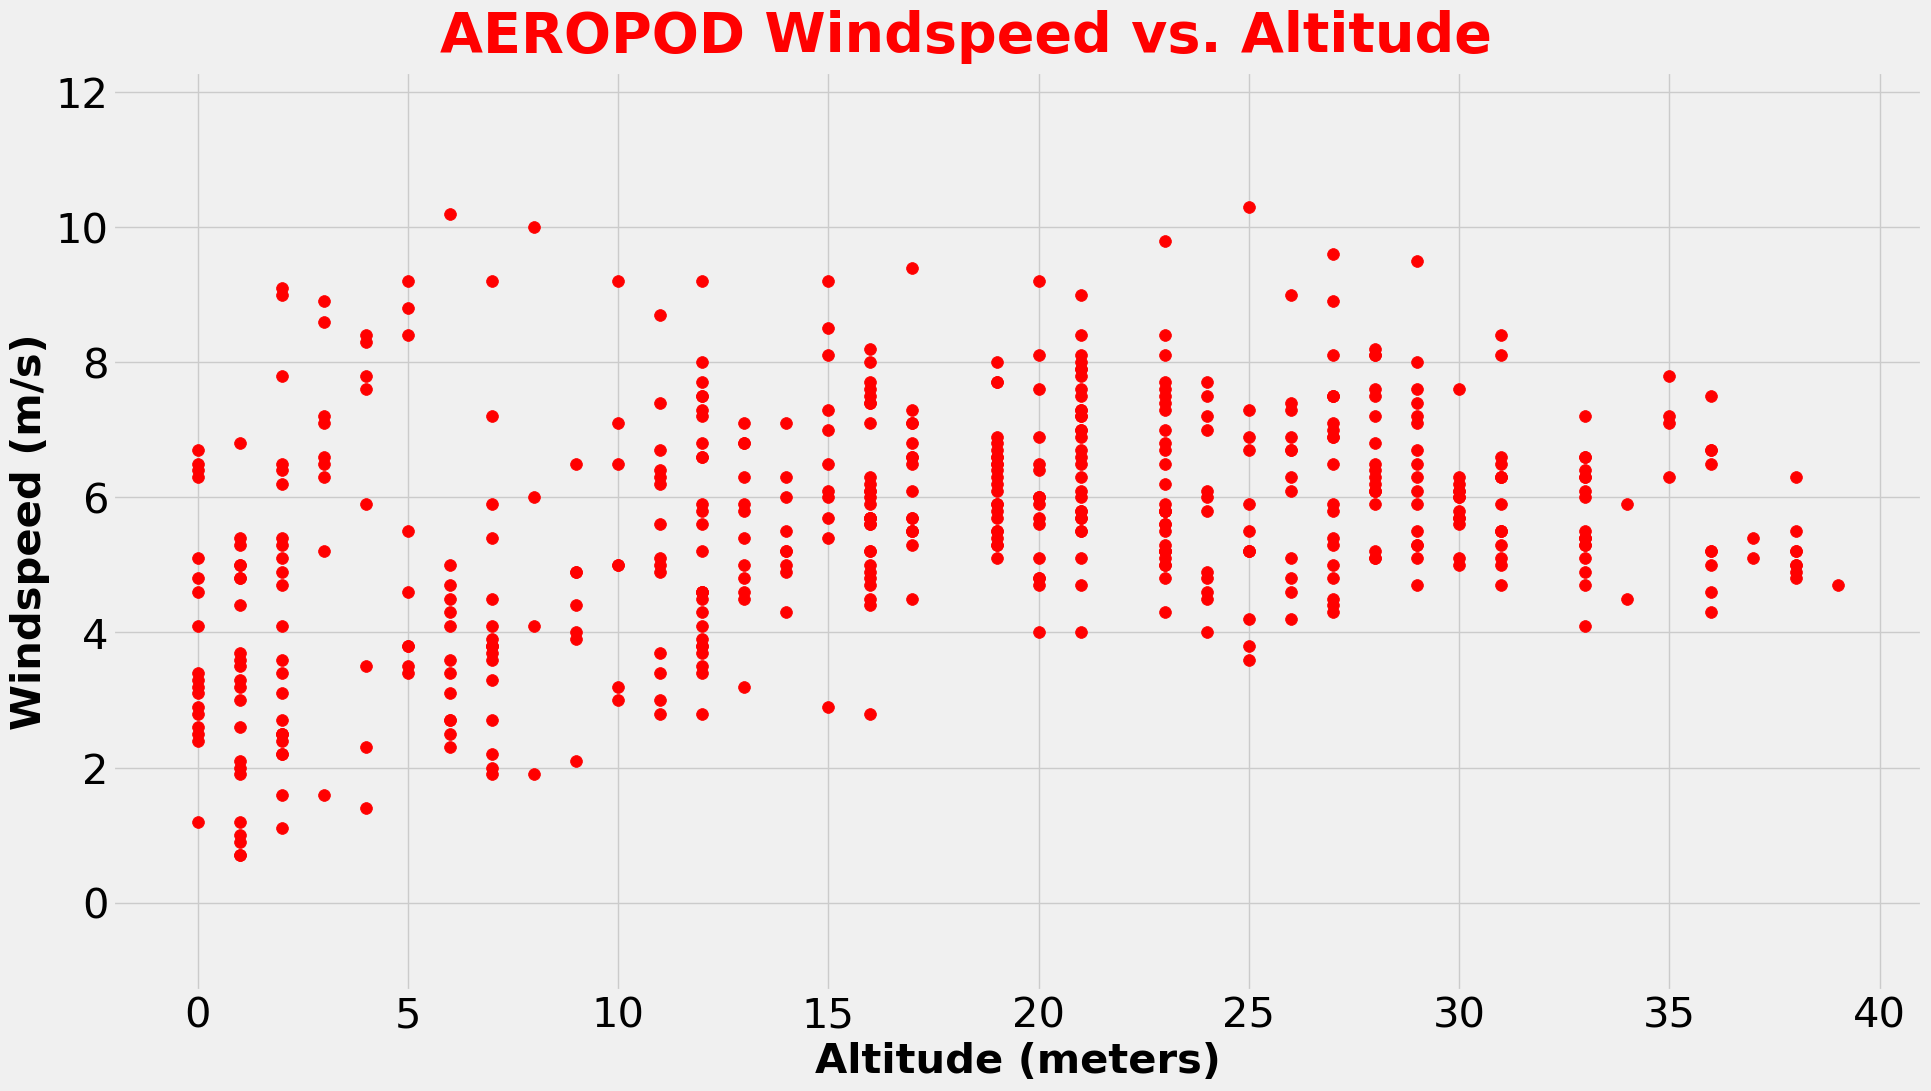

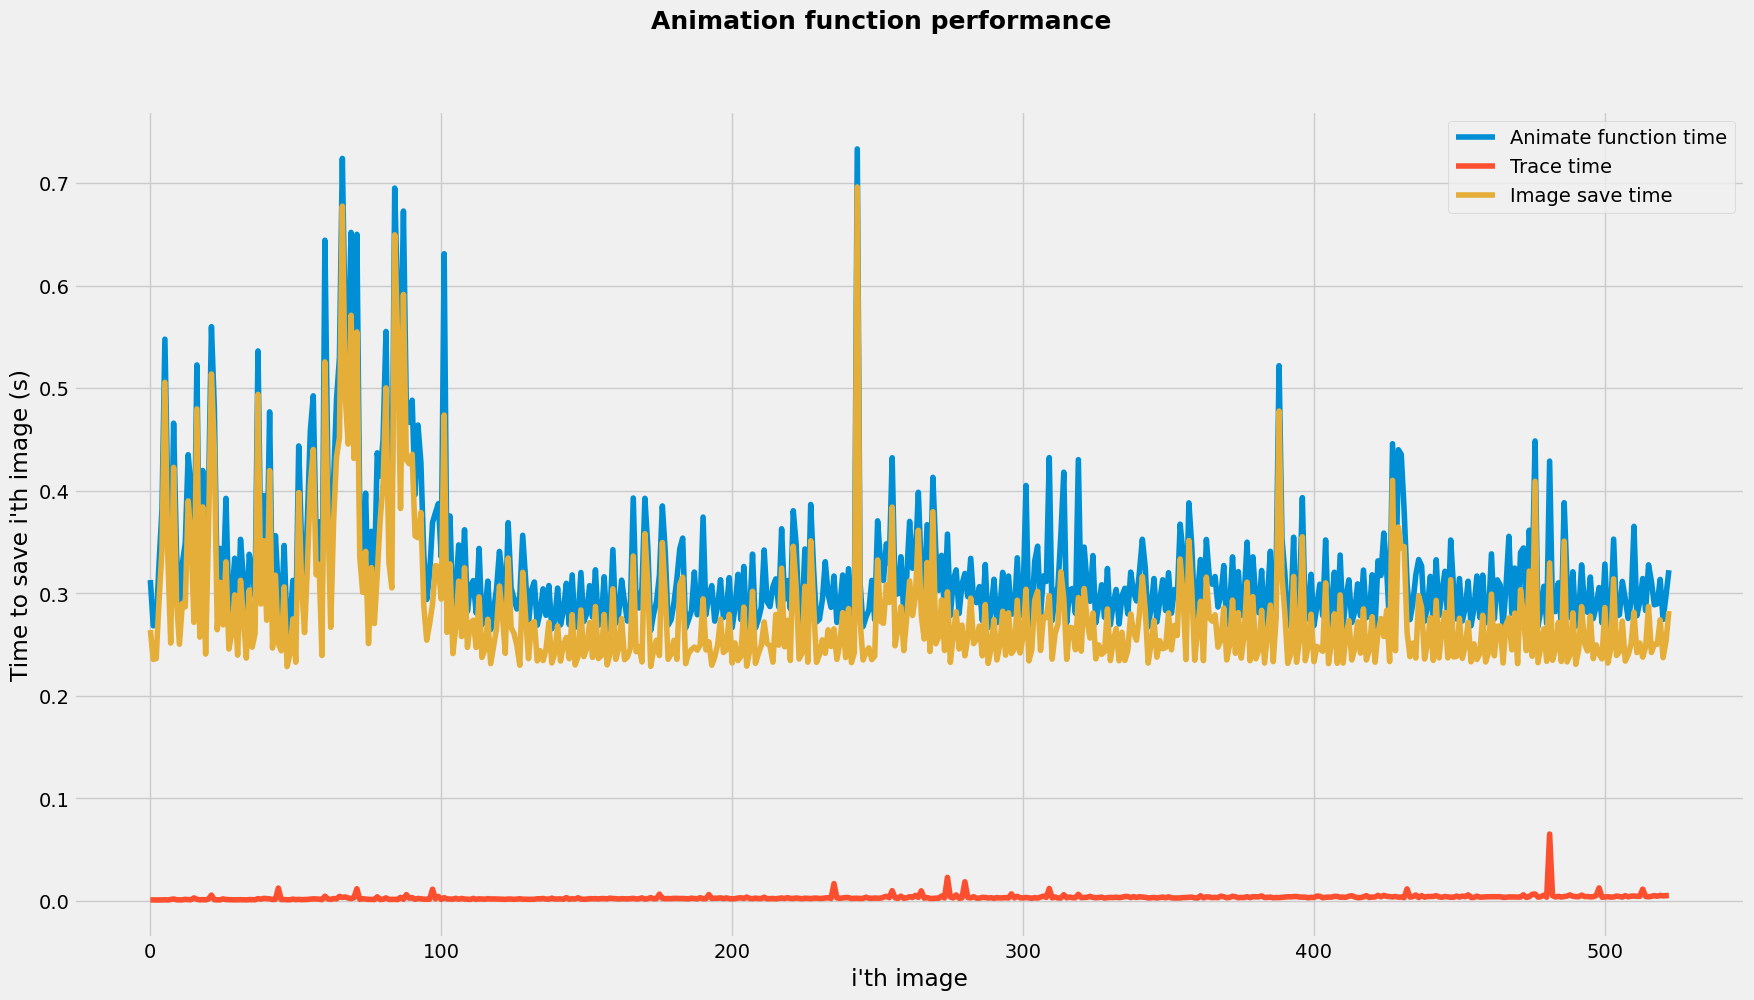

In [93]:
import time as tm
import matplotlib.pyplot as plt

df = df_aeropod
time = df[timelabel]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df["AOG (Meters)"]
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

padding = 2

alt_min = alt.min() - padding
alt_max = alt.max() + padding

windspeed_min = windspeed.min() - padding
windspeed_max = windspeed.max() + padding

render_times = []
trace_times = []
save_times = []

def animate(title, xmin, xmax, ymin, ymax, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8), layout="constrained")
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    dotsize = 72

    x = []
    y = []
    
    print(f"Saving to {pic_path}")
    for i in range(len(time)):
        start_render = tm.perf_counter()
        
        x.append(alt[i]) 
        y.append(windspeed[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        
        plt.xlabel("Altitude (meters)", color="black", fontweight="bold", fontsize=30)
        plt.xticks(color="black", fontsize=30)
        plt.xlim(xmin, xmax) #ymin and ymax
        
        plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(color="black", fontsize = 30)
        plt.ylabel("Windspeed (m/s)", color = "black", fontweight="bold", fontsize = 30) #ylabel

        #Ghost plot
        plt.scatter(alt, windspeed, color=color, alpha=0.07, s = dotsize)
        
        #Plot
        start_trace = tm.perf_counter()
        plt.scatter(x, y, color = color, s = dotsize) #color
        end_trace = tm.perf_counter()

        start_save = tm.perf_counter()
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        end_save = tm.perf_counter()
        print(f"{i}.png has been saved")
        
        end_render = tm.perf_counter()
        render_time = end_render - start_render
        render_times.append(render_time)
        
        trace_time = end_trace - start_trace
        trace_times.append(trace_time)
        
        save_time = end_save - start_save
        save_times.append(save_time)
        
        
    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
    return render_times, trace_times, save_times

render_times, trace_times, save_times = animate("AEROPOD Windspeed vs. Altitude", alt_min, alt_max, windspeed_min, windspeed_max, pngs, "red")

fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle("Animation function performance", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times, label="Animate function time")
plt.plot(x, trace_times, label="Trace time")
plt.plot(x, save_times, label="Image save time")
plt.xlabel("i'th image")
plt.ylabel("Time to save i'th image (s)")
plt.legend()
plt.show()


In [91]:
pngs = "./wsvsalt/"

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates


def animate(title, pic_path, color):
    time = df_aeropod[timelabel]

    #yvalue
    temp_aeropod = df_aeropod[templabel]
    baro_aeropod = df_aeropod[barolabel]
    alt_aeropod = df_aeropod["AOG (Meters)"]
    windspeed_aeropod = df_aeropod[windspeedlabel]
    magdir_aeropod = df_aeropod[magdirlabel]

    temp_ground = df_ground[templabel]
    baro_ground = df_ground[barolabel]
    windspeed_ground = df_ground[windspeedlabel]
    magdir_ground = df_ground[magdirlabel]

    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")
    
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)

    x = []
    y = []
    
    print(f"Saving to {pic_path}")
    
    render_times = []
    num_of_images = 0
    start = tm.perf_counter()    
    for i in range(len(time)):
        start_render = tm.perf_counter()
        
        x.append(time[i]) 
        y.append(alt_aeropod[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        #plt.xlim(time_min, time_max)
        plt.xticks(time[0::50], fontweight = "bold")
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(color=color, fontsize = 30)
        #plt.ylabel(color = color, fontsize = 30) #ylabel

        plt.plot(time, alt_aeropod, color="firebrick", alpha=0.2, label=altlabel)
        plt.plot(x, y, color = color) #color

        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=True)
        print(f"{i}.png has been saved")
        
        end_render = tm.perf_counter()
        render_time = end_render - start_render
        render_times.append(render_time)
        num_of_images += 1
        
    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    print(f"Length of render times: {len(render_times)}")
    
    return render_times, num_of_images

#animate("Mag. Dir. (Degrees) vs. Time", magdir, magdirvstimepath, "black")

render_times, num_of_images = animate("Altitude (Meters) vs. Time", pngs, "red")

#animate("Barometric Pressure (mb) vs. Time", baro, barovstimepath, "navy")

#animate("Wind Speed (m/s) vs. Time", windspeed, windspeedvstimepath, "green")



In [ ]:
fig = plt.figure(figsize = (19.2,10.2))
x = [i for i in range(num_of_images)]
plt.plot(x, render_times)
plt.show()

## Ghost plots

In [ ]:
#Re-format the time ticks
#Size 1920 x 1080
#Axis labels
#Plot styles plt.style.use

import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df[df.columns[0]]

#ylabel
barolabel = df.columns[5]
altlabel = df.columns[6]
templabel = df.columns[2]
windspeedlabel = df.columns[10]
magdirlabel = df.columns[14]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df["AOG (Meters)"]
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,2.2))
    fig.suptitle(title, fontweight = "bold", fontsize = 18, color = color)

    x = []
    y = []
    
    #To adjust formatting of the arrow indicating the time
    half = len(time)/2
    half = int(half)
    
    for i in range(len(time)):
        x.append(time[i]) 
        y.append(yvalue[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        plt.xlim(time_min, time_max)
        plt.xticks(time[0::50], fontweight = "bold", fontsize=10)
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(color=color, fontsize = 20)
        #plt.ylabel(color = color, fontsize = 30) #ylabel
        
        #Ghost plot
        plt.plot(time, alt, color="firebrick", alpha=0.2, label=altlabel)
        
        #Ghost shading under curve
        plt.vlines(time, 0, alt, linewidths = 1.3, alpha=0.2, linestyles="solid")

        #Time and alt indicator
        currenttime = x[i].strftime(f"%I:%M:%S %p\n{y[i]} meters")
        
        #Time on the right side of tracer
        if(i < half):
            plt.annotate(currenttime, xy=(x[i],y[i]), xytext= (time[i+20],y[i]), arrowprops=dict(facecolor="black"), fontweight="bold")
            
        #Time on the left side of tracer
        else:
            plt.annotate(currenttime, xy=(x[i],y[i]), xytext= (time[i-60],y[i]), arrowprops=dict(facecolor="black"), fontweight="bold")
        
        #Draw the plot        
        #Shading under curve
        plt.vlines(x[0:i], 0, y[0:i], linewidths = 1.3, linestyles="solid")
        
        #Values
        plt.plot(x, y, color = color) #color
        
        #Ghost line tracer
        plt.axvline(x=x[i], color="green", linewidth=4)
        
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")


animate("Altitude (Meters) vs. Time", alt, pngs, "red")




## Alt v. time scrubber with time window style 1
<video controls src="./templates/altvtime_summary_withtimewindow.mp4" width=500 height=100>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

df = df_aeropod

time = df[df.columns[0]]

#ylabel
barolabel = df.columns[5]
altlabel = df.columns[6]
templabel = df.columns[2]
windspeedlabel = df.columns[10]
magdirlabel = df.columns[14]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df["AOG (Meters)"]
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,2.2))
    fig.suptitle(title, fontweight = "bold", fontsize = 18, color = color)

    x = []
    y = []
    
    #To adjust formatting of the arrow indicating the time
    half = len(time)/2
    half = int(half)
    
    ticks = time[0::50]
    
    #For rerendering the time window shading
    n = 0
    len_ticks = len(ticks)
    timewindow_start = ticks.iat[n] 
    timewindow_end = ticks.iat[n+1]
    
    for i in range(len(time)):
        x.append(time[i]) 
        y.append(yvalue[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        plt.xlim(time_min, time_max)
        plt.xticks(ticks, fontweight = "bold", fontsize=10)
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        #plt.yticks(color=color, fontsize = 20)
        #plt.ylabel(color = color, fontsize = 30) #ylabel
        plt.tick_params(left= False, labelleft = False)
        
        #Ghost plot
        plt.plot(time, alt, color="firebrick", alpha=0.2, label=altlabel)
        
        #Ghost shading under curve
        plt.vlines(time, 0, alt, linewidths = 1.3, alpha=0.2, linestyles="solid")

        #Time and alt indicator
        currenttime = x[i].strftime(f"%I:%M:%S %p\n{y[i]} meters")
        
        #Time on the right side of tracer
        if(i < half):
            plt.annotate(currenttime, xy=(x[i],y[i]), xytext= (time[i+20],y[i]), arrowprops=dict(facecolor="black"), fontweight="bold")
            
        #Time on the left side of tracer
        else:
            plt.annotate(currenttime, xy=(x[i],y[i]), xytext= (time[i-60],y[i]), arrowprops=dict(facecolor="black"), fontweight="bold")
        
        #Draw the plot        
        #Shading under curve
        plt.vlines(x[0:i], 0, y[0:i], linewidths = 1.3, linestyles="solid")
        
        #Values
        plt.plot(x, y, color = color) #color

        #Ghost line tracer
        plt.axvline(x=x[i], color="green", linewidth=3)        
        
        #Time window
        #Redraw the time window once the ghost line tracer reaches the end
        if (x[i] == timewindow_end) and (x[i] != time.iat[-1]):
            n += 1
            if (n == len_ticks-1):
                timewindow_start = ticks.iat[n] 
                timewindow_end = time.iat[-1]
                print("LAST WINDOW")
            else:
                timewindow_start = ticks.iat[n] 
                timewindow_end = ticks.iat[n+1]
        
        #print(f"n is equal to {n}")
        plt.axvspan(xmin=timewindow_start, xmax=timewindow_end, ymin=0, ymax=1,alpha=0.5)        
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
##############################################################################################

animate("Altitude (Meters) vs. Time", alt, pngs, "red")



## Alt v. time scrubber with time window style 2
<video controls src="./templates/altvtime_summary_dynamictimewindow.mp4" width=500 height=200>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

df = df_aeropod

time = df[timelabel]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df["AOG (Meters)"]
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,2.2))
    fig.suptitle(title, fontweight = "bold", fontsize = 18, color = color)

    x = []
    y = []
    
    #To adjust formatting of the arrow indicating the time
    half = len(time)/2
    half = int(half)
    
    ticks = time[0::50]
    
    #For rerendering the time window shading    
    timewindow_range = (ticks.iat[1] - ticks.iat[0]) / 2
    
    render_times = []
    print(f"Saving to {pic_path}")
    
    for i in range(len(time)):
        start_render = tm.perf_counter()
        x.append(time[i]) 
        y.append(yvalue[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        
        plt.xlim(time_min, time_max)
        plt.xticks(ticks, fontweight = "bold", fontsize=10)
        plt.gca().xaxis.set_major_formatter(date_format)
        
        #plt.ylim(ymin, ymax) #ymin and ymax
        plt.yticks(color=color, fontsize = 20)
        #plt.ylabel(color = color, fontsize = 30) #ylabel
        #plt.tick_params(left= False, labelleft = False) #To hide the y value ticks
        
        #Ghost plot
        plt.plot(time, alt, color="firebrick", alpha=0.2, label=altlabel)
        
        #Ghost shading under curve
        plt.vlines(time, 0, alt, linewidths = 1.3, alpha=0.2, linestyles="solid")

        #Time and alt indicator
        currenttime = x[i].strftime(f"%I:%M:%S %p\n{y[i]} meters")
        
        #Time on the right side of tracer
        if(i < half):
            plt.annotate(currenttime, xy=(x[i],y[i]), xytext= (time[i+20],y[i]), arrowprops=dict(facecolor="black"), fontweight="bold")
            
        #Time on the left side of tracer
        else:
            plt.annotate(currenttime, xy=(x[i],y[i]), xytext= (time[i-60],y[i]), arrowprops=dict(facecolor="black"), fontweight="bold")
        
        #Draw the plot        
        #Shading under curve
        plt.vlines(x[0:i], 0, y[0:i], linewidths = 1.3, linestyles="solid")
        
        #Values
        plt.plot(x, y, color = color) #color

        #Ghost line tracer
        plt.axvline(x=x[i], color="green", linewidth=3)        
        
        #Time window
        #Redraw the time window once the ghost line tracer reaches the end
        timewindow_start = x[i] - (timewindow_range)
        timewindow_end = x[i] + (timewindow_range)
        plt.axvspan(xmin=timewindow_start, xmax=timewindow_end, ymin=0, ymax=1,alpha=0.5)        
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")
        
        end_render = tm.perf_counter()
        render_time = end_render - start_render
        render_times.append(render_time)

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
    return render_times
##############################################################################################

render_times = animate("Altitude (Meters) vs. Time", alt, pngs, "red")

fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle("Image render time vs. image", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times)
plt.show()


## Changing time range style 1
<video controls src="./templates/alt_temp_changing time range.mp4" width=500 height=200>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df_aeropod[timelabel]

#yvalue
temp_aeropod = df_aeropod[templabel]
baro_aeropod = df_aeropod[barolabel]
alt_aeropod = df_aeropod["AOG (Meters)"]
windspeed_aeropod = df_aeropod[windspeedlabel]
magdir_aeropod = df_aeropod[magdirlabel]

temp_ground = df_ground[templabel]
baro_ground = df_ground[barolabel]
windspeed_ground = df_ground[windspeedlabel]
magdir_ground = df_ground[magdirlabel]

def animate(title, pic_path, color):

    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")    

    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)

    x = []
    temp_aeropod_trace = []
    temp_ground_trace = []
    alt_aeropod_trace = []
    
    ticks = time[0::50]    
    len_ticks = len(ticks)
    start_index = 0   
    n = 0
    timewindow_start = ticks.iat[n]
    timewindow_end = ticks.iat[n+1]    
    end_index = time == timewindow_end
    end_index = time[end_index].index 
    end_index = end_index[0]

    timerange = time[start_index:end_index]
    temp_aeropod_ghost = temp_aeropod[start_index:end_index]
    temp_ground_ghost = temp_ground[start_index:end_index]
    alt_aeropod_ghost = alt_aeropod[start_index:end_index] 
    
    render_times = []
    print(f"Saving to {pic_path}")  
    start = tm.perf_counter()    
    for i in range(len(time)):
        start_render = tm.perf_counter()
        
        x.append(time[i])
        temp_aeropod_trace.append(temp_aeropod[i])
        temp_ground_trace.append(temp_ground[i])
        alt_aeropod_trace.append(alt_aeropod[i]) 

        plt.cla()
        plt.grid(visible=True)
        plt.xticks(ticks)
        plt.gca().xaxis.set_major_formatter(date_format)
        plt.yticks(color=color, fontsize = 30)
        
        #Ghost plots
        plt.plot(timerange, alt_aeropod_ghost, color="firebrick", alpha=0, )        
 
        #Draw the plot        
        #Values
        l1 = plt.plot(x, alt_aeropod_trace, color = "firebrick", label="AEROPOD Altitude")    
        l2 = plt.plot(x, temp_aeropod_trace, color = "cyan", label="AEROPOD Temp")    
        l3 = plt.plot(x, temp_ground_trace, color = "blue", label="GROUND Temp")
        
        #Ghost line tracer
        plt.axvline(x=x[-1], color="green", linewidth=3)          
    
        #Redraw the plot with different time range
        if (x[-1] == timewindow_end) and (x[-1] != time.iat[-1]):
            n += 1
            
            #Bounds for the ghost plots
            if (n == (len_ticks - 1)):
                timewindow_start = ticks.iat[n]
                timewindow_end = time.iat[-1]
            else:
                timewindow_start = ticks.iat[n]
                timewindow_end = ticks.iat[n+1] #Time value to use to compare

            #Get the index for the time window range plot
            start_index=end_index            
            end_index = time == timewindow_end
            end_index = time[end_index].index 
            end_index = end_index[0]

            timerange = time[start_index:end_index]
            temp_aeropod_ghost = temp_aeropod[start_index:end_index]
            temp_ground_ghost = temp_ground[start_index:end_index]
            alt_aeropod_ghost = alt_aeropod[start_index:end_index]
            
            x = [x[-1]]
            temp_aeropod_trace = [temp_aeropod_trace[-1]]
            temp_ground_trace = [temp_ground_trace[-1]]
            alt_aeropod_trace = [alt_aeropod_trace[-1]]
            
        #Legend
        lns = l1 + l2 + l3
        labels = [l.get_label() for l in lns]
        
        fig.legend(lns, labels, loc="upper right", labelcolor="black")
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False) #I think the False transparency is what makes the renders longer
        print(f"{i}.png has been saved")
        
        end_render = tm.perf_counter()
        render_time = end_render - start_render
        render_times.append(render_time)
        
    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
    return render_times
    
##############################################################################################

render_times = animate("Altitude and Temperature", pngs, "black")

fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle("Image render time vs. image", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times)
plt.show()


## Seismograph style
<video controls src="./templates/alt_temp_seismographstyle.mp4" width=500 height=200>animation</video>

Saving to ./Alt_vs_Time/png/
0.png has been saved
1.png has been saved
2.png has been saved
3.png has been saved
4.png has been saved
5.png has been saved
6.png has been saved
7.png has been saved
8.png has been saved
9.png has been saved
10.png has been saved
11.png has been saved
12.png has been saved
13.png has been saved
14.png has been saved
15.png has been saved
16.png has been saved
17.png has been saved
18.png has been saved
19.png has been saved
20.png has been saved
21.png has been saved
22.png has been saved
23.png has been saved
24.png has been saved
25.png has been saved
26.png has been saved
27.png has been saved
28.png has been saved
29.png has been saved
30.png has been saved
31.png has been saved
32.png has been saved
33.png has been saved
34.png has been saved
35.png has been saved
36.png has been saved
37.png has been saved
38.png has been saved
39.png has been saved
40.png has been saved
41.png has been saved
42.png has been saved
43.png has been saved
44.png has be

360.png has been saved
361.png has been saved
362.png has been saved
363.png has been saved
364.png has been saved
365.png has been saved
366.png has been saved
367.png has been saved
368.png has been saved
369.png has been saved
370.png has been saved
371.png has been saved
372.png has been saved
373.png has been saved
374.png has been saved
375.png has been saved
376.png has been saved
377.png has been saved
378.png has been saved
379.png has been saved
380.png has been saved
381.png has been saved
382.png has been saved
383.png has been saved
384.png has been saved
385.png has been saved
386.png has been saved
387.png has been saved
388.png has been saved
389.png has been saved
390.png has been saved
391.png has been saved
392.png has been saved
393.png has been saved
394.png has been saved
395.png has been saved
396.png has been saved
397.png has been saved
398.png has been saved
399.png has been saved
400.png has been saved
401.png has been saved
402.png has been saved
403.png has

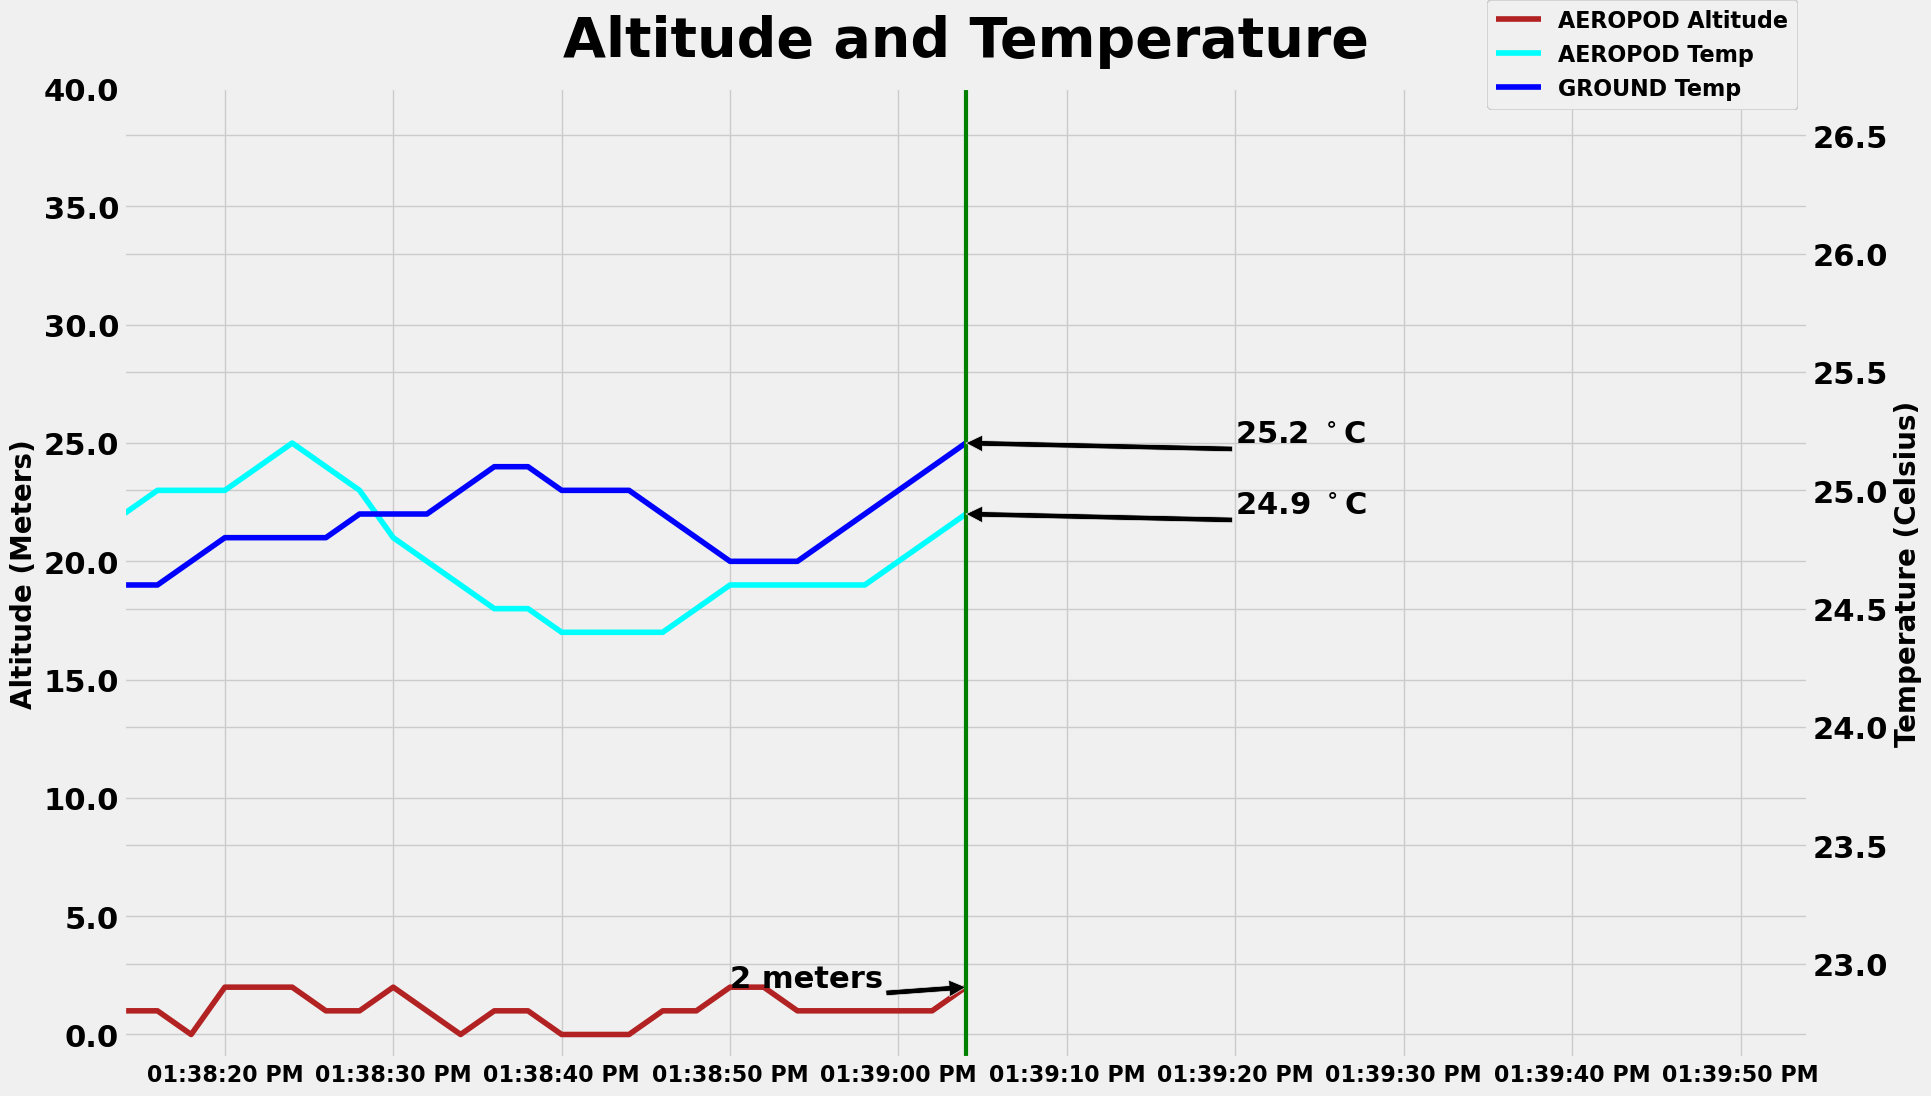

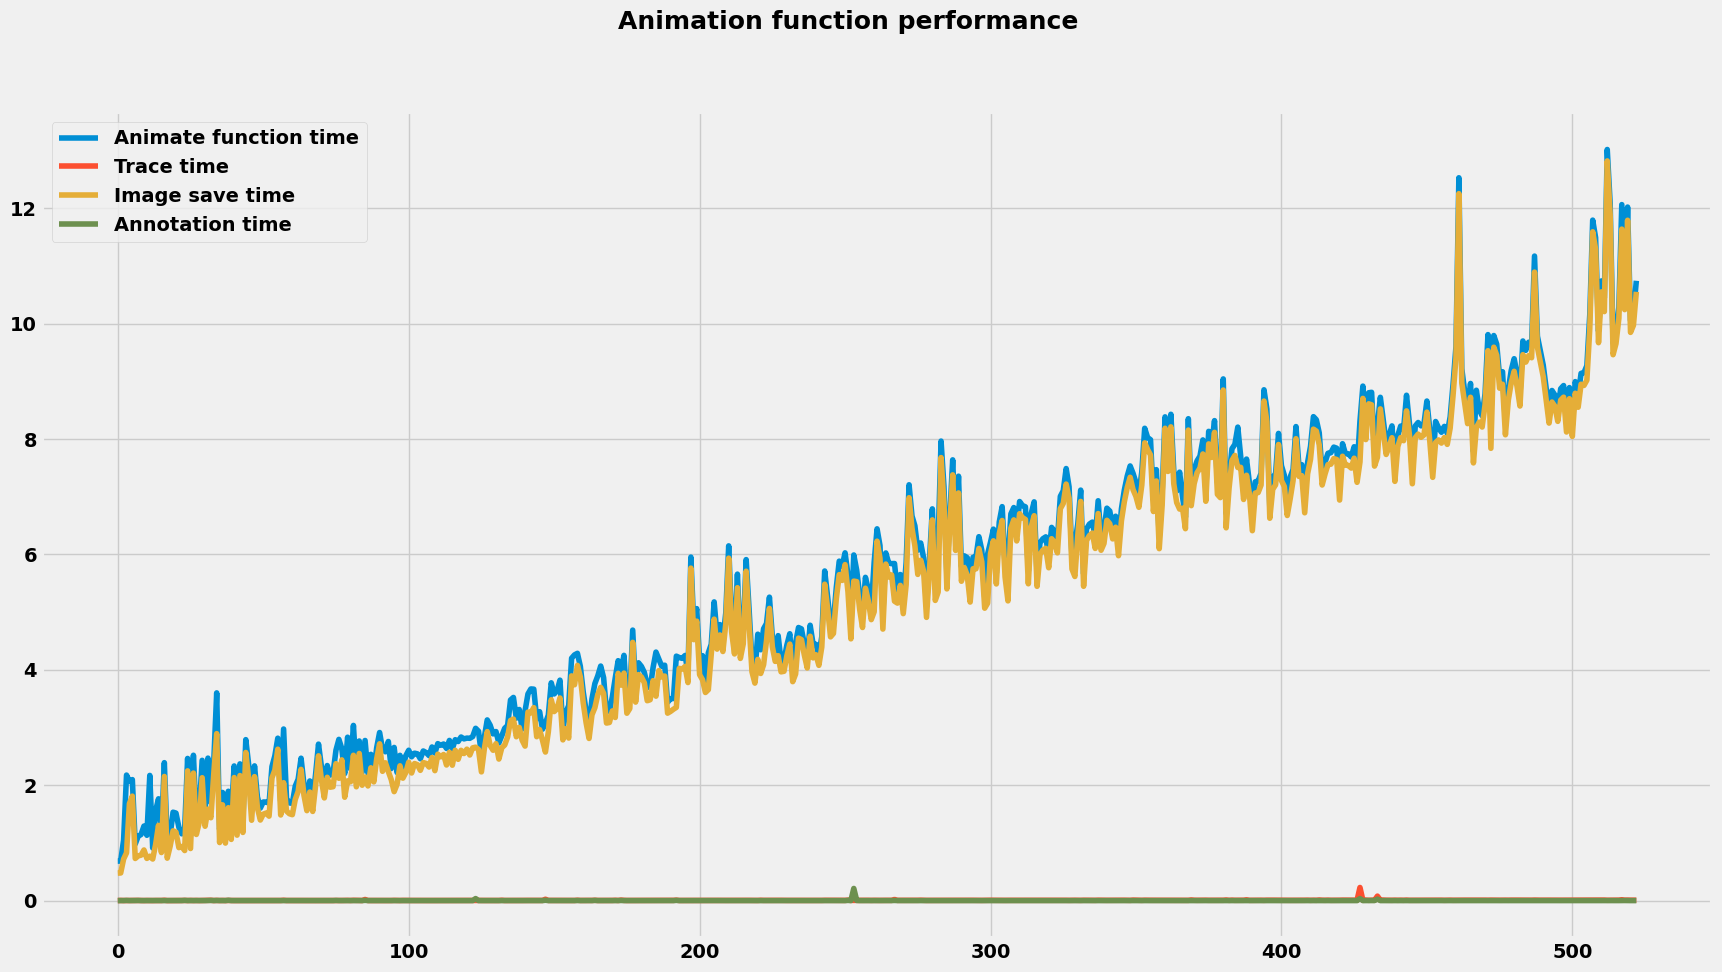

In [83]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rc

time = df_aeropod[timelabel]

#yvalue
temp_aeropod = df_aeropod[templabel]
baro_aeropod = df_aeropod[barolabel]
alt_aeropod = df_aeropod["AOG (Meters)"]
windspeed_aeropod = df_aeropod[windspeedlabel]
magdir_aeropod = df_aeropod[magdirlabel]

temp_ground = df_ground[templabel]
baro_ground = df_ground[barolabel]
windspeed_ground = df_ground[windspeedlabel]
magdir_ground = df_ground[magdirlabel]

y_axis_padding = 1

alt_min = alt_aeropod.min() - y_axis_padding
alt_max = alt_aeropod.max() + y_axis_padding

temp_aeropod_min = temp_aeropod.min()
temp_aeropod_max = temp_aeropod.max()
temp_ground_min = temp_ground.min()
temp_ground_max = temp_ground.max()

temps = [temp_aeropod_min, temp_aeropod_max, temp_ground_min, temp_ground_max]
temp_min = min(temps) - y_axis_padding
temp_max = max(temps) + y_axis_padding

def animate(title, pic_path, color):
    start = tm.perf_counter() 
    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")    
    ghostvalue = 0.15

    rc("font", weight="bold")
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize = (19.2,10.8), layout="constrained")
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    
    ax2 = ax.twinx()

    x = []
    temp_aeropod_trace = []
    temp_ground_trace = []
    alt_aeropod_trace = []
    
    ticks = time[0::50]  
    timewindow_range = (ticks.iat[1] - ticks.iat[0])
    
    render_times = []
    trace_times = []
    save_times = []
    annotation_times = []
    print(f"Saving to {pic_path}")     
    for i in range(len(time)):
        start_render = tm.perf_counter()
        
        ax.cla()
        ax2.cla()        
        
        x.append(time[i])
        temp_aeropod_trace.append(temp_aeropod[i])
        temp_ground_trace.append(temp_ground[i])
        alt_aeropod_trace.append(alt_aeropod[i]) 
        
        time_min = x[i] - (timewindow_range / 2)
        time_max = x[i] + (timewindow_range / 2)
        
        #Formatting
        ax.set_ylim(alt_min, alt_max)    
        ax2.set_ylim(temp_min, temp_max)        
        plt.grid(visible=True)
        plt.xlim(time_min, time_max)
        plt.gca().xaxis.set_major_formatter(date_format)
        ax.yaxis.set_major_formatter("{x:.1f}")        
        ax2.yaxis.set_major_formatter("{x:.1f}")
        
        ax.tick_params(axis="x", labelsize=16)
        ax.tick_params(axis="y", labelsize=22)
        ax.set_ylabel("Altitude (Meters)", color="black", fontweight="bold", fontsize=20)   
        ax2.tick_params(axis="y",  labelsize=22)
        ax2.set_ylabel("Temperature (Celsius)", color="black",fontweight="bold", fontsize=20)
        
        #Ghost plots    

        start_index = time == x[i]
        start_index = time[start_index].index 
        start_index = start_index[0]
        
        try:       
            end_index = time == time_max
            end_index = time[end_index].index 
            end_index = end_index[0]

            timerange = time[start_index:end_index]
            temp_aeropod_ghost = temp_aeropod[start_index:end_index]
            temp_ground_ghost = temp_ground[start_index:end_index]
            alt_aeropod_ghost = alt_aeropod[start_index:end_index]

            ax.plot(timerange, alt_aeropod_ghost, color = "firebrick", label="AEROPOD Altitude", alpha = ghostvalue)    
            ax2.plot(timerange, temp_aeropod_ghost, color = "cyan", label="AEROPOD Temp", alpha = ghostvalue)    
            ax2.plot(timerange, temp_ground_ghost, color = "blue", label="GROUND Temp", alpha = ghostvalue)
        except:
            end_index = -1

            timerange = time[start_index:end_index]
            temp_aeropod_ghost = temp_aeropod[start_index:end_index]
            temp_ground_ghost = temp_ground[start_index:end_index]
            alt_aeropod_ghost = alt_aeropod[start_index:end_index]

            ax.plot(timerange, alt_aeropod_ghost, color = "firebrick", label="AEROPOD Altitude", alpha = ghostvalue)    
            ax2.plot(timerange, temp_aeropod_ghost, color = "cyan", label="AEROPOD Temp", alpha = ghostvalue)    
            ax2.plot(timerange, temp_ground_ghost, color = "blue", label="GROUND Temp", alpha = ghostvalue)
        
        #Draw the plot        
        #Values
        start_trace = tm.perf_counter()
        l1 = ax.plot(x, alt_aeropod_trace, color = "firebrick", label="AEROPOD Altitude")    
        l2 = ax2.plot(x, temp_aeropod_trace, color = "cyan", label="AEROPOD Temp")    
        l3 = ax2.plot(x, temp_ground_trace, color = "blue", label="GROUND Temp")
        end_trace = tm.perf_counter()
        
        #Ghost line tracer
        plt.axvline(x=x[-1], color="green", linewidth=3)
        
        #Annotations
        start_annotate = tm.perf_counter()
        current_x_location = x[-1]
        aeropod_alt_y = alt_aeropod_trace[-1]
        aeropod_temp_y = temp_aeropod_trace[-1]
        ground_temp_y = temp_ground_trace[-1]
        
        plot_ticks = ax.get_xticks()
        plot_ticks_mid = len(plot_ticks) // 2
        temp_text_x_location = plot_ticks[plot_ticks_mid+1]
        alt_text_x_location = plot_ticks[plot_ticks_mid-2]
        
        ax.annotate(f"{aeropod_alt_y} meters", xy=(current_x_location,aeropod_alt_y), xytext= (alt_text_x_location, aeropod_alt_y), arrowprops=dict(facecolor="black"), fontweight="bold", fontsize=22)
        ax2.annotate(f"{aeropod_temp_y} $^\circ$C", xy=(current_x_location,aeropod_temp_y), xytext= (temp_text_x_location, aeropod_temp_y), arrowprops=dict(facecolor="black"), fontweight="bold", fontsize=22)
        ax2.annotate(f"{ground_temp_y} $^\circ$C", xy=(current_x_location,ground_temp_y), xytext= (temp_text_x_location, ground_temp_y), arrowprops=dict(facecolor="black"), fontweight="bold", fontsize=22)
        
        end_annotate = tm.perf_counter()
        
        #Legend
        lns = l1 + l2 + l3
        labels = [l.get_label() for l in lns]
        
        fig.legend(lns, labels, loc=(0.77,0.9), labelcolor="black", fontsize=16)
        
        #Export plot
        start_save = tm.perf_counter()
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False) #I think the False transparency is what makes the renders longer?
        end_save = tm.perf_counter()
        print(f"{i}.png has been saved")
        #plt.show()
        
        end_render = tm.perf_counter()
        render_time = end_render - start_render
        render_times.append(render_time)
        
        trace_time = end_trace - start_trace
        trace_times.append(trace_time)
        
        save_time = end_save - start_save
        save_times.append(save_time)
        
        annotate_time = end_annotate - start_annotate
        annotation_times.append(annotate_time)
        
    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
    return render_times, trace_times, save_times, annotation_times
    
##############################################################################################

render_times, trace_times, save_times, annotation_times = animate("Altitude and Temperature", pngs, "black")

fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle("Animation function performance", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times, label="Animate function time")
plt.plot(x, trace_times, label="Trace time")
plt.plot(x, save_times, label="Image save time")
plt.plot(x, annotation_times, label="Annotation time")
plt.xlabel("i'th image")
plt.ylabel("Time to save i'th image (s)")
plt.legend()
plt.show()


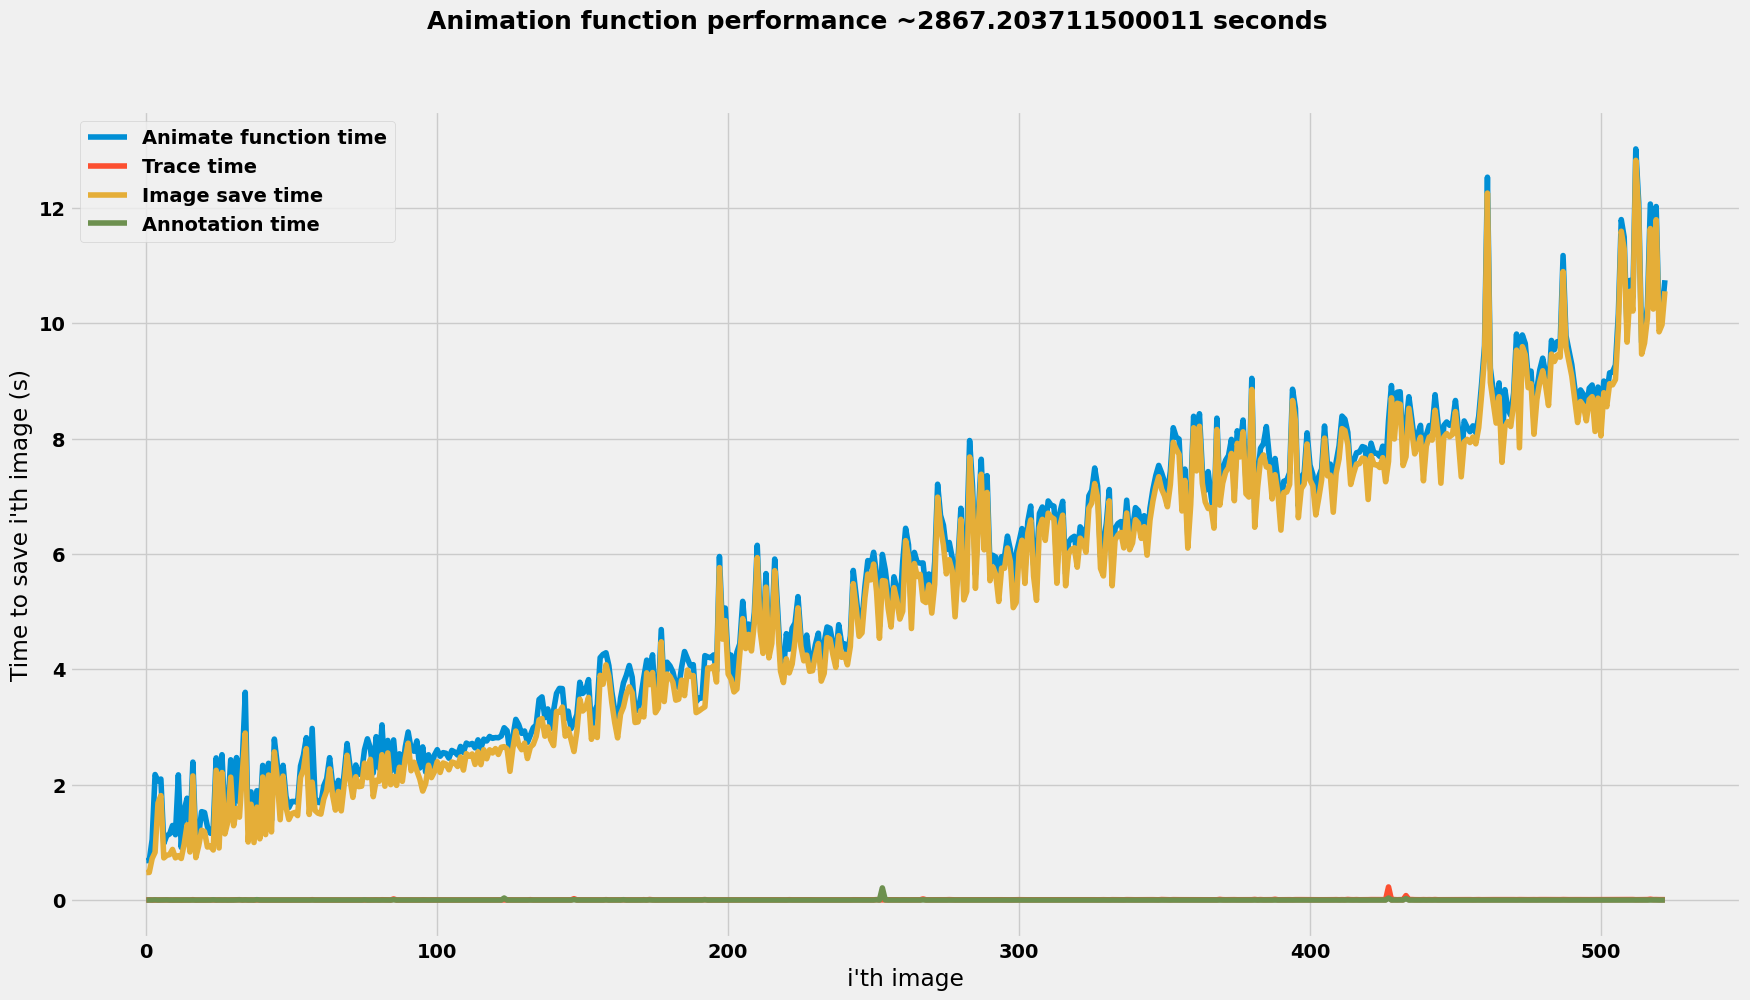

In [85]:
duration = sum(render_times)
fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle(f"Animation function performance ~{duration} seconds", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times, label="Animate function time")
plt.plot(x, trace_times, label="Trace time")
plt.plot(x, save_times, label="Image save time")
plt.plot(x, annotation_times, label="Annotation time")
plt.xlabel("i'th image")
plt.ylabel("Time to save i'th image (s)")
plt.legend()
plt.show()

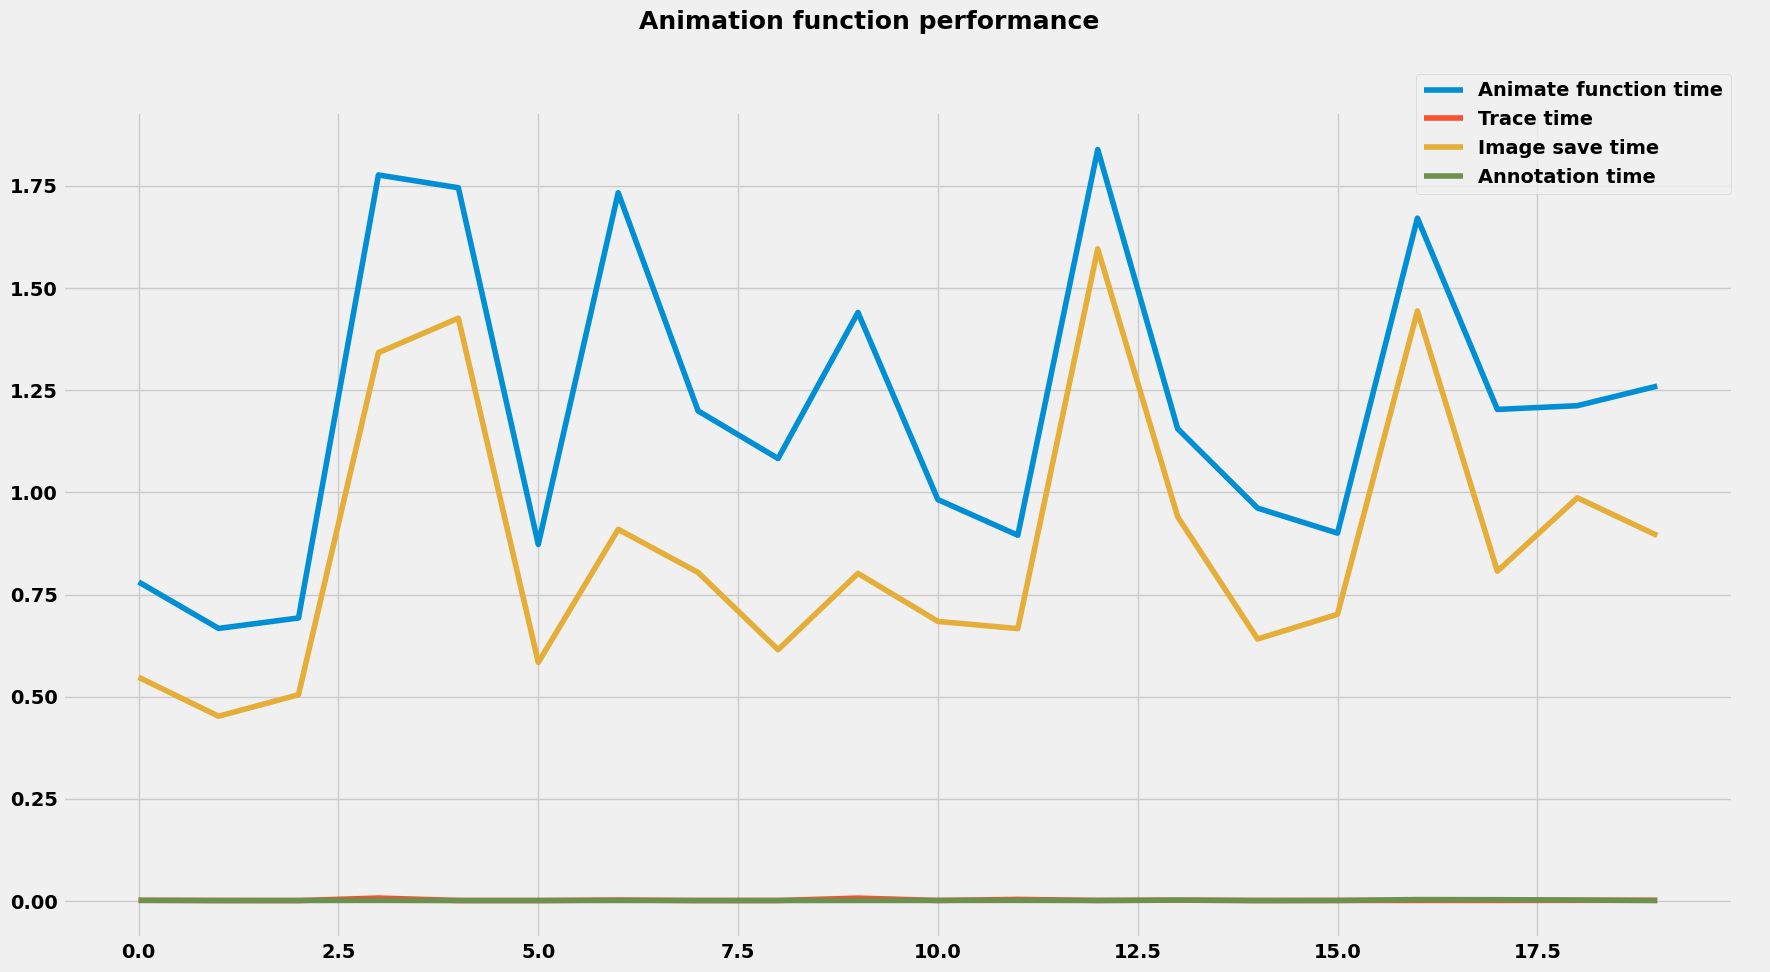

In [76]:
fig, ax = plt.subplots(figsize = (19.2,10.2))
fig.suptitle("Animation function performance", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(render_times))]
ax.plot(x, render_times, label="Animate function time")
ax.plot(x, trace_times, label="Trace time")
ax.plot(x, save_times, label="Image save time")
ax.plot(x, annotation_times, label="Annotation time")
fig.legend(loc=(0.8,0.8))
plt.show()

In [59]:
foo = ax.get_xticks()
foo

array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ])

In [33]:
pngs = "./Alt_vs_Time/png/"

In [ ]:
plt.plot(x, trace_times, label="Trace time")

In [ ]:
foo = 20.20202
print(f"{foo:.1f}")

## Entire time range
<video controls src="./templates/alt_temp_entire time range.mp4" width=500 height=200>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

def animate(title, pic_path, color):
    print(f"Saving to {pic_path}")
    start = tm.perf_counter()
    time = df_aeropod[timelabel]

    #yvalue
    temp_aeropod = df_aeropod[templabel]
    baro_aeropod = df_aeropod[barolabel]
    alt_aeropod = df_aeropod["AOG (Meters)"]
    windspeed_aeropod = df_aeropod[windspeedlabel]
    magdir_aeropod = df_aeropod[magdirlabel]

    temp_ground = df_ground[templabel]
    baro_ground = df_ground[barolabel]
    windspeed_ground = df_ground[windspeedlabel]
    magdir_ground = df_ground[magdirlabel]

    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    lw = 2

    x = []
    temp_aeropod_trace = []
    temp_ground_trace = []
    alt_aeropod_trace = []
    
    ticks = time[0::50]    
    
    for i in range(len(time)):
        x.append(time[i])
        temp_aeropod_trace.append(temp_aeropod[i])
        temp_ground_trace.append(temp_ground[i])
        alt_aeropod_trace.append(alt_aeropod[i]) 

        plt.cla()
        plt.grid(visible=True)
        plt.xticks(ticks)
        plt.gca().xaxis.set_major_formatter(date_format)
        plt.yticks(color=color, fontsize = 30)
        
        #Ghost plots
        plt.plot(time, alt_aeropod, color="firebrick", alpha=0.15, lw=lw)        
        plt.plot(time, temp_aeropod, color="cyan", alpha=0.15, lw=lw)
        plt.plot(time, temp_ground, color="blue", alpha=0.15, lw=lw)
 
        #Draw the plot        
        #Values
        l1 = plt.plot(x, alt_aeropod_trace, color = "firebrick", label="AEROPOD Altitude", lw=lw)    
        l2 = plt.plot(x, temp_aeropod_trace, color = "cyan", label="AEROPOD Temp", lw=lw)    
        l3 = plt.plot(x, temp_ground_trace, color = "blue", label="GROUND Temp", lw=lw)
        
        #Ghost line tracer
        plt.axvline(x=x[-1], color="green", linewidth=3)          
    
        #Legend
        lns = l1 + l2 + l3
        labels = [l.get_label() for l in lns]
        
        fig.legend(lns, labels, loc="upper right", labelcolor="black")
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
##############################################################################################

animate("Altitude and Temperature", pngs, "black")


In [ ]:
pngs = './Alt_vs_Time/'
pngs

## Windspeed and Mag Dir

## Entire time range
<video controls src="./templates/windspeed_magdir_entire time range.mp4" width=500 height=200>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

def animate(title, pic_path, color):
    print(f"Saving to {pic_path}")
    time = df_aeropod[timelabel]

    #yvalue
    temp_aeropod = df_aeropod[templabel]
    baro_aeropod = df_aeropod[barolabel]
    alt_aeropod = df_aeropod["AOG (Meters)"]
    windspeed_aeropod = df_aeropod[windspeedlabel]
    magdir_aeropod = df_aeropod[magdirlabel]

    temp_ground = df_ground[templabel]
    baro_ground = df_ground[barolabel]
    windspeed_ground = df_ground[windspeedlabel]
    magdir_ground = df_ground[magdirlabel]

    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")
    ymin = alt_aeropod.min()
    ymax = alt_aeropod.max()

    lw = 2
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    
    ax2 = ax.twinx()
  
    x = []
    windspeed_aeropod_trace = []
    windspeed_ground_trace = []
    magdir_aeropod_trace = []
    magdir_ground_trace = []
    
    ticks = time[0::50]    
    len_ticks = len(ticks)
    start_index = 0   
    n = 0
    for i in range(len(time)):  
        
        x.append(time[i])
        windspeed_aeropod_trace.append(windspeed_aeropod[i])
        windspeed_ground_trace.append(windspeed_ground[i])
        magdir_aeropod_trace.append(magdir_aeropod[i]) 
        magdir_ground_trace.append(magdir_ground[i])
        
        ax.cla() 
        ax2.cla()
        
        plt.grid(visible=True)
        plt.gca().xaxis.set_major_formatter(date_format)
        plt.xticks(ticks)
  
        ax.tick_params(axis="y", labelcolor="black", labelsize=22)
        ax.set_ylabel("Windspeed (m/s)", color="black", fontweight="bold", fontsize=16)   
        ax2.tick_params(axis="y", labelcolor="black", labelsize=22)
        ax2.set_ylabel("Mag. Dir. (Degrees)", color="black",fontweight="bold", fontsize=16)           
        
        #Ghost plots
        ax.plot(time, windspeed_aeropod, color="purple", alpha=0.15, lw=lw) 
        ax.plot(time, windspeed_ground, color="navy", alpha=0.15, lw=lw)
        ax2.plot(time, magdir_aeropod, color = "darkorange", alpha=0.15, lw=lw)    
        ax2.plot(time, magdir_ground, color = "limegreen", alpha=0.15, lw=lw)     

        #Draw the plot        
        #Values
        l1 = ax.plot(x, windspeed_aeropod_trace, color = "purple", label="AEROPOD Windspeed", lw=lw)  
        l3 = ax.plot(x, windspeed_ground_trace, color = "navy", label="GROUND Windspeed", lw=lw)
        
        l2 = ax2.plot(x, magdir_aeropod_trace, color = "darkorange", label="AEROPOD Mag. Dir.", lw=lw)    
        l4 = ax2.plot(x, magdir_ground_trace, color = "limegreen", label="GROUND Mag. Dir", lw=lw)
      
        #Ghost line tracer
        plt.axvline(x=x[i], color="green", linewidth=3)          
            
        #Legend
        lns = l1 + l2 + l3 + l4
        labels = [l.get_label() for l in lns]
        
        fig.legend(lns, labels, loc="upper right", labelcolor="black")
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")
    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
##############################################################################################

animate("Windspeed and Mag. Dir", wsmgdir, "black")


In [ ]:
wsmgdir = "./ws_mgdir_entiretimerange/"

## Changing time range style 1
<video controls src="./templates/windspeed_magdir_changing time range.mp4" width=500 height=200>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

def animate(title, pic_path, color):
    time = df_aeropod[timelabel]
    
    #yvalue
    temp_aeropod = df_aeropod[templabel]
    baro_aeropod = df_aeropod[barolabel]
    alt_aeropod = df_aeropod["AOG (Meters)"]
    windspeed_aeropod = df_aeropod[windspeedlabel]
    magdir_aeropod = df_aeropod[magdirlabel]

    temp_ground = df_ground[templabel]
    baro_ground = df_ground[barolabel]
    windspeed_ground = df_ground[windspeedlabel]
    magdir_ground = df_ground[magdirlabel]

    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")
    ymin = alt_aeropod.min()
    ymax = alt_aeropod.max()
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    
    ax2 = ax.twinx()
  
    x = []
    windspeed_aeropod_trace = []
    windspeed_ground_trace = []
    magdir_aeropod_trace = []
    magdir_ground_trace = []
    
    ticks = time[0::50]    
    len_ticks = len(ticks)
    start_index = 0   
    n = 0
    timewindow_start = ticks.iat[n]
    timewindow_end = ticks.iat[n+1] #Time value to use to compare   
    #Get the index for the time window range plot
    end_index = time == timewindow_end
    end_index = time[end_index].index 
    end_index = end_index[0]
    timerange = time[start_index:end_index]
    windspeed_aeropod_ghost = windspeed_aeropod[start_index:end_index]    
    
    for i in range(len(time)):

        x.append(time[i])
        windspeed_aeropod_trace.append(windspeed_aeropod[i])
        windspeed_ground_trace.append(windspeed_ground[i])
        magdir_aeropod_trace.append(magdir_aeropod[i]) 
        magdir_ground_trace.append(magdir_ground[i])        
        
        ax.cla() 
        ax2.cla()
        
        plt.grid(visible=True)
        plt.gca().xaxis.set_major_formatter(date_format)        
        plt.xticks(ticks)
        
        ax.tick_params(axis="y", labelcolor="black", labelsize=22)
        ax.set_ylabel("Windspeed (m/s)", color="black", fontweight="bold", fontsize=16)   
        ax2.tick_params(axis="y", labelcolor="black", labelsize=22)
        ax2.set_ylabel("Mag. Dir. (Degrees)", color="black",fontweight="bold", fontsize=16)   
        
        #Ghost plots
        ax.plot(timerange, windspeed_aeropod_ghost, color="firebrick", alpha=0)        

        #Draw the plot        
        #Values
        
        l1 = ax.plot(x, windspeed_aeropod_trace, color = "purple", label="AEROPOD Windspeed")  
        l3 = ax.plot(x, windspeed_ground_trace, color = "navy", label="GROUND Windspeed")
        
        l2 = ax2.plot(x, magdir_aeropod_trace, color = "darkorange", label="AEROPOD Mag. Dir.")    
        l4 = ax2.plot(x, magdir_ground_trace, color = "limegreen", label="GROUND Mag. Dir")
        
        #Ghost line tracer
        plt.axvline(x=x[-1], color="green", linewidth=3)          
    
        #Redraw the plot with different time range
        if (x[-1] == timewindow_end) and (x[-1] != time.iat[-1]):
            n += 1
            #Bounds for the ghost plots
            if (n == (len_ticks - 1)):
                timewindow_start = ticks.iat[n]
                timewindow_end = time.iat[-1]
            else:
                timewindow_start = ticks.iat[n]
                timewindow_end = ticks.iat[n+1] #Time value to use to compare

            #Get the index for the time window range plot
            start_index=end_index
            end_index = time == timewindow_end
            end_index = time[end_index].index 
            end_index = end_index[0]

            timerange = time[start_index:end_index]
            windspeed_aeropod_ghost = windspeed_aeropod[start_index:end_index]
            #windspeed_ground_ghost = windspeed_ground[start_index:end_index]
            #magdir_aeropod_ghost = magdir_aeropod[start_index:end_index]
            #magdir_ground_ghost = magdir_ground[start_index:end_index]

            x = [x[-1]]
            windspeed_aeropod_trace = [windspeed_aeropod_trace[-1]]
            windspeed_ground_trace = [windspeed_ground_trace[-1]]
            magdir_aeropod_trace = [magdir_aeropod_trace[-1]]
            magdir_ground_trace = [magdir_ground_trace[-1]]
            
        #Legend
        lns = l1 + l2 + l3 + l4
        labels = [l.get_label() for l in lns]
        
        fig.legend(lns, labels, loc="upper right", labelcolor="black")
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
##############################################################################################

animate("Windspeed and Mag. Dir", wsmgdir, "black")


In [ ]:
wsmgdir = "./ws_mgdir_changingtimerange/"

## Seismograph style
<video controls src="./templates/windspeed_magdir_seismographstyle.mp4" width=500 height=200>animation</video>

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rc

def animate(title, pic_path, color):
    start = tm.perf_counter()
    
    time = df_aeropod[timelabel]
    
    #yvalue
    temp_aeropod = df_aeropod[templabel]
    baro_aeropod = df_aeropod[barolabel]
    alt_aeropod = df_aeropod["AOG (Meters)"]
    windspeed_aeropod = df_aeropod[windspeedlabel]
    magdir_aeropod = df_aeropod[magdirlabel]

    temp_ground = df_ground[templabel]
    baro_ground = df_ground[barolabel]
    windspeed_ground = df_ground[windspeedlabel]
    magdir_ground = df_ground[magdirlabel]

    date_format = mpl_dates.DateFormatter("%I:%M:%S %p")
    rc("font", weight="bold")    
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize = (19.2,10.8), layout="constrained")
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    
    ax2 = ax.twinx()
  
    x = []
    windspeed_aeropod_trace = []
    windspeed_ground_trace = []
    magdir_aeropod_trace = []
    magdir_ground_trace = []
    
    ticks = time[0::50]    
    timewindow_range = (ticks.iat[1] - ticks.iat[0]) 
    
    render_times = []
    trace_times = []
    save_times = []
    print(f"Saving to {pic_path}")     
    for i in range(len(time)):
        start_render = tm.perf_counter()

        ax.cla() 
        ax2.cla()        
        
        x.append(time[i])
        windspeed_aeropod_trace.append(windspeed_aeropod[i])
        windspeed_ground_trace.append(windspeed_ground[i])
        magdir_aeropod_trace.append(magdir_aeropod[i]) 
        magdir_ground_trace.append(magdir_ground[i])        
        
        time_min = x[i] - (timewindow_range / 2)
        time_max = x[i] + (timewindow_range / 2)   
        
        plt.grid(visible=True)
        plt.xlim(time_min, time_max)        
        plt.gca().xaxis.set_major_formatter(date_format)        
        #ax.yaxis.set_major_formatter("{x:.0f}")        
        #ax2.yaxis.set_major_formatter("{x:.0f}")        
        ax.tick_params(axis="y", labelcolor="black", labelsize=22)
        ax.set_ylabel("Windspeed (m/s)", color="black", fontweight="bold", fontsize=16)   
        ax2.tick_params(axis="y", labelcolor="black", labelsize=22)
        ax2.set_ylabel("Mag. Dir. (Degrees)", color="black",fontweight="bold", fontsize=16)   

        #Draw the plot        
        #Values
        start_trace = tm.perf_counter()     
        
        l1 = ax.plot(x, windspeed_aeropod_trace, color = "purple", label="AEROPOD Windspeed")  
        l3 = ax.plot(x, windspeed_ground_trace, color = "navy", label="GROUND Windspeed")
        l2 = ax2.plot(x, magdir_aeropod_trace, color = "darkorange", label="AEROPOD Mag. Dir.")    
        l4 = ax2.plot(x, magdir_ground_trace, color = "limegreen", label="GROUND Mag. Dir")
        
        end_trace = tm.perf_counter()
        
        #Ghost line tracer
        plt.axvline(x=x[-1], color="green", linewidth=3)          
            
        #Legend
        lns = l1 + l2 + l3 + l4
        labels = [l.get_label() for l in lns]
        
        fig.legend(lns, labels, loc="upper right", labelcolor="black")
        
        #Export plot
        start_save = tm.perf_counter()
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")
        end_save = tm.perf_counter()

        end_render = tm.perf_counter()
        render_time = end_render - start_render
        render_times.append(render_time)
        
        trace_time = end_trace - start_trace
        trace_times.append(trace_time)
        
        save_time = end_save - start_save
        save_times.append(save_time)
        
    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
    return render_times, trace_times, save_times
    
##############################################################################################

render_times, trace_times, save_times = animate("Windspeed and Mag. Dir", wsmgdir, "black")

fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle("Animation function performance", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times, label="Animate function time")
plt.plot(x, trace_times, label="Trace time")
plt.plot(x, save_times, label="Image save time")
plt.legend()
plt.show()


In [ ]:
fig = plt.figure(figsize = (19.2,10.2))
fig.suptitle("Animation function performance", fontweight = "bold", fontsize = 18)
x = [i for i in range(len(time))]
plt.plot(x, render_times, label="Animate function time")
plt.plot(x, trace_times, label="Trace time")
plt.plot(x, save_times, label="Image save time")
plt.xlabel("i'th image")
plt.ylabel("Time to save i'th image (s)")
plt.legend()
plt.show()

In [ ]:
wsmgdir = "./ws_mgdir_changingtimerange/"

In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df[df.columns[0]]

#yvalue
temp_aeropod = df_aeropod[templabel]
baro_aeropod = df_aeropod[barolabel]
alt_aeropod = df_aeropod["AOG (Meters)"]
windspeed_aeropod = df_aeropod[windspeedlabel]
magdir_aeropod = df_aeropod[magdirlabel]

temp_ground = df_ground[templabel]
baro_ground = df_ground[barolabel]
windspeed_ground = df_ground[windspeedlabel]
magdir_ground = df_ground[magdirlabel]

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, pic_path, color):
    start = tm.perf_counter()
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)

    x = []
    temp_aeropod_trace = []
    temp_ground_trace = []
    alt_aeropod_trace = []
    
    ticks = time[0::50]    

    for i in range(len(time)):
        x.append(time[i])
        temp_aeropod_trace.append(temp_aeropod[i])
        temp_ground_trace.append(temp_ground[i])
        alt_aeropod_trace.append(alt_aeropod[i]) 

        plt.cla()
        plt.grid(visible=True)
        plt.xticks(ticks, fontweight = "bold")
        plt.gca().xaxis.set_major_formatter(date_format)
        plt.yticks(color=color, fontsize = 30)
        
        #Ghost plots
        plt.plot(time, alt_aeropod, color="firebrick", alpha=0.2, )        
        plt.plot(time, temp_aeropod, color="cyan", alpha=0.2, )
        plt.plot(time, temp_ground, color="green", alpha=0.2, )

        
        #Draw the plot        
        #Values
        l1 = plt.plot(x, alt_aeropod_trace, color = "firebrick", label="AEROPOD Altitude")    
        l2 = plt.plot(x, temp_aeropod_trace, color = "cyan", label="AEROPOD Temp")    
        l3 = plt.plot(x, temp_ground_trace, color = "green", label="GROUND Temp")
    
            
        #Legend
        lns = l1 + l2 + l3
        labels = [l.get_label() for l in lns]
        
        plt.legend(lns, labels, loc="upper right", labelcolor="black")
        
        #Export plot
        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png", transparent=False)
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")
    
##############################################################################################



animate("Top Plot", alt, pngs, "red")




In [ ]:
import time as tm
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

time = df[df.columns[0]]

#ylabel
barolabel = df.columns[5]
altlabel = df.columns[6]
templabel = df.columns[2]
windspeedlabel = df.columns[8]
magdirlabel = df.columns[14]

#yvalue
temp = df[templabel]
baro = df[barolabel]
alt = df[altlabel] + 55
windspeed = df[windspeedlabel]
magdir = df[magdirlabel]

#ymin and ymax
time_min = time.min()
time_max = time.max()

temp_min = temp.min()
temp_max = temp.max()

alt_min = alt.min()
alt_max = alt.max()

windspeed_min = windspeed.min()
windspeed_max = windspeed.max()

magdir_min = magdir.min()
magdir_max = magdir.max()

date_format = mpl_dates.DateFormatter("%I:%M:%S %p")

def animate(title, yvalue, ylabel, pic_path, color):
    start = tm.perf_counter()
    
    fig = plt.figure(figsize = (19.2,10.8))
    fig.suptitle(title, fontweight = "bold", fontsize = 40, color = color)
    plt.style.use("fivethirtyeight")
    x = []
    y = []
    
    for i in range(len(time)):
        x.append(time[i]) 
        y.append(yvalue[i]) #yvalue

        plt.cla()
        plt.grid(visible=True)
        plt.xlim(time_min, time_max) 
        #plt.ylim(ymin, ymax) #ymin and ymax

        plt.xticks(time[0::50], fontweight = "bold", fontsize = 14)
        plt.yticks(color=color, fontsize = 30)
        plt.ylabel(color = color, fontsize = 30) #ylabel

        plt.gca().xaxis.set_major_formatter(date_format)
        plt.plot(x, y, color = color) #color

        path = pic_path + str(i) + ".png" #pic_path
        plt.savefig(path, format="png")
        print(f"{i}.png has been saved")

    end = tm.perf_counter()
    duration = end - start
    print(f"All pictures saved in about {duration} seconds")

#animate("Mag. Dir. (Degrees) vs. Time", magdir, magdirlabel, magdirvstimepath, "black")

#animate("Altitude (Meters) vs. Time", alt, altlabel, altvstimepath, "red")

#animate("Barometric Pressure (mb) vs. Time", baro, barolabel, barovstimepath, "navy")

animate("Wind Speed (m/s) vs. Time", windspeed, windspeedlabel, windspeedvstimepath, "green")



## STEP 6: ERROR CHECKING
### Check the data types of the headers

<table>
  <tr>
    <th>Measurement</th>
    <th>Units</th>
    <th>Expected Data Type</th>
  </tr>
  <tr>
    <td>Time</td>
    <td>(yyyy-MM-dd hh:mm:ss)</td>
    <td style="font-family: monospace">datetime64[ns]</td>
  </tr>
  <tr>
    <td>Temp</td>
    <td>Fahrenheit | Celsius</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Wet Bulb Temp.</td>
    <td>Fahrenheit | Celsius</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Rel. Hum.</td>
    <td>%</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Baro.</td>
    <td>inHg | hPA | psi | mb</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Altitude</td>
    <td>Meters | Feet</td>
    <td style="font-family: monospace">int64</td>
  </tr>
  <tr>
    <td>Station P.</td>
    <td>inHg | hPA | psi | mb</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Wind Speed</td>
    <td>mph | fpm | Bft | m/s | km/h | kt</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Heat Index</td>
    <td>Fahrenheit | Celsius</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Dew Point</td>
    <td>Fahrenheit | Celsius</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Dens. Alt.</td>
    <td>Meters | Feet</td>
    <td style="font-family: monospace">int64</td>
  </tr>
  <tr>
    <td>Crosswind</td>
    <td>mph | fpm | Bft | m/s | km/h | kt</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Headwind</td>
    <td>mph | fpm | Bft | m/s | km/h | kt</td>
    <td style="font-family: monospace">float64</td>
  </tr>
  <tr>
    <td>Mag. Dir</td>
    <td>Cardinal Points | Degrees</td>
    <td style="font-family: monospace">int64</td>
  </tr>
  <tr>
    <td>True Dir.</td>
    <td>Cardinal Points | Degrees</td>
    <td style="font-family: monospace">int64</td>
  </tr>
  <tr>
    <td>Wind Chill</td>
    <td>Fahrenheit | Celsius</td>
    <td style="font-family: monospace">float64</td>
  </tr>

</table>

### Check for any invalid values, corrupt values, etc
- These invalid/corrupt values are most likely the reason why the data types differ from the expected

In [ ]:
#Run this cell once
#LOOK FOR ANY CORRUPT FIELDS, NAN, ETC
#ERROR CHECKING ON UNITS 
indices = []
invalidcols = []
nullcols = []

asterisks_bool = False
nulls_bool = False

#Find columns with *** entries
asterisks = df.isin(["***"])
for col in asterisks.columns:
    if asterisks[col].values.any():
        invalidcols.append(col)

if len(invalidcols) != 0:
    asterisks_bool = True
    
#Find columns with NaN values
nulls = df.isnull()
for col in nulls.columns:
    if nulls[col].values.any():
        nullcols.append(col)

if len(nullcols) != 0:
    nulls_bool = True

#Find the specific rows in the entire dataframe
if asterisks_bool and nulls_bool:
    for i in range(len(df)):
        invalid = df.iloc[i]
        if invalid.hasnans: 
            indices.append(i)
        if ("***" in invalid.values): #reference https://stackoverflow.com/questions/30944577/check-if-string-is-in-a-pandas-dataframe
            indices.append(i)
elif asterisks_bool:
    for i in range(len(df)):
        invalid = df.iloc[i]
        if ("***" in invalid.values): #reference https://stackoverflow.com/questions/30944577/check-if-string-is-in-a-pandas-dataframe
            indices.append(i)
elif nulls_bool:
    for i in range(len(df)):
        invalid = df.iloc[i]
        if invalid.hasnans: 
            indices.append(i)

indices = set(indices) #Use a set to ignore duplicates

if len(indices) == 0:
    print("No errors have been detected")
    print("Proceed to STEP 7")

if asterisks_bool and nulls_bool:
    print("*** entries have been detected in the following columns")
    print(*invalidcols, sep="\n")
    print("NaN entries have been detected in the following columns")
    print(*nullcols, sep = "\n")
    print("\nProceed to STEP 6A to identify them and STEP 6B for any further action")

elif asterisks_bool:
    print("*** entries have been detected in the following columns")
    print(*invalidcols, sep="\n")
    print("\nProceed to STEP 6A to identify them and STEP 6B for any further action")
    
elif nulls_bool:
    print("NaN entries have been detected in the following columns")
    print(*nullcols, sep = "\n")
    print("\nProceed to STEP 6A to identify them and STEP 6B for any further action")
    
#check nulls reference https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/

### STEP 6A: Review the data with error values

In [ ]:
#View the entire dataframe, filtered with the invalid values
df.filter(items=indices, axis=0)

### STEP 6B: Determine whether to ignore the entire corrupt fields or replace the individual corrupt values with a null/error indicating value
- Ignore the entire corrupt fields if they are not of interest, and proceed to STEP 8
- Replace the individual values if the fields are of interest
    - Ex. Rows 0-100 are of interest, but row 50 has a corrupt value; this will have to be noted

In [ ]:
#Replace the *** entries with a value
error_value = 0

asterisks = df != "***"
df = df.where(asterisks, error_value)
for col in invalidcols:
    change_history.append(f"All asterisks in the {col} column were replaced with a {error_value}\n")
    print(change_history[-1])

#Convert header data types to expected data types
df[columns[0]] = pd.to_datetime(df[columns[0]]) #Convert time to datetime
change_history.append("The Datetime column was converted to type datetime64[ns]\n")
print(change_history[-1])

#TODO MAKE THIS INSTRUCTION MORE CLEAR; USER WILL TYPE HERE
#INSERT YOUR MEASUREMENTS WITH THE EXPECTED DATA TYPES HERE
#MEASUREMENTS MUST BE TYPED IN EXACTLY AS IT IS IN THE DATAFRAME
expected_dtypes = {
    "Crosswind (m/s)": "float",
    "Headwind (m/s)": "float",
    "Mag. Dir. (Degrees)": "int",
    "True Dir. (Degrees)": "int"
}

for col in expected_dtypes:
    if col in df:
        df[col] = df[col].astype(expected_dtypes[col])
        change_history.append(f"The {col} column was converted to type {expected_dtypes[col]}\n")
        print(change_history[-1])
        
print("Data types have been successfully changed")
print("\n")
print(df.dtypes)
print("\n")
print("Proceed to STEP 7")

In [ ]:
change_history.clear()

***END OF CLEAN DATA STAGE***
***

# IDENTIFY THE DATA OF INTEREST

## Using time deltas
- The time deltas are intended to help easily identify a field test <br>
- "Spikes" in the time delta graph will most likely indicate 
    - The start and end of a field test
    - A clock reset 
    - When the Kestrel was turned on <br>
<br>

Time Deltas are calculated as follows
- $\Delta t_{i,\ i+1} = t_{i+1} - t_{i}$
where $\Delta t_{i,\ i+1}$ is the change in time from the entry at row $i$ to $i+1$
- ($\Delta t_{0,\ 1} = t_{1} - t_{0}$
where $\Delta t_{0,\ 1}$ is the change in time from the entry at row $0$ to $1$)

## STEP 7: Calculating all time deltas

In [ ]:
try:
    #Also here if the error checking steps were skipped
    df[columns[0]] = pd.to_datetime(df[columns[0]])

    #Date column as string variable
    date = columns[0]

    #List to store deltas
    deltas = []

    #Total number of data entry rows
    rows = len(df)

    #Calculate all time deltas and store in list
    i = 0
    while i != (rows-1):
        time1 = df.loc[i,date]
        time2 = df.loc[i+1,date]
        delta = time2 - time1
        deltas.append(delta)
        i+=1
    deltas.append("LAST TIME ENTRY") #Helper text

    #Convert list to series
    deltas = pd.Series(deltas, name="Time Delta")

    #Create separate series of time deltas in seconds
    td_seconds = []
    for td in deltas:
        if isinstance(td, str): #Necessary for entries with helper text
            td_seconds.append(td)
        else:
            td_seconds.append(td.total_seconds())
    td_seconds = pd.Series(td_seconds, name="Time Delta (seconds)")

    #Initialize dataframe with datetime columns
    times = pd.DataFrame(df[date]).rename(columns={date:"Datetime"})

    #Create datetime + 1 and datetime - 1 series to be added into times df
    dtplusone = pd.Series(index=range(rows), name="Datetime_i+1", dtype="object")
    dtminusone = pd.Series(index=range(rows), name="Datetime_i-1", dtype="object")

    #Append necessary values
    dtplusone[0:-1] = df.loc[1:, date]
    dtplusone[rows-1] = "LAST TIMESTAMP" #Helper text---is it necessary?

    dtminusone[1:] = df.loc[:rows-2, date]
    dtminusone[0] = "FIRST TIMESTAMP" #Helper text---is it necessary?

    times = times.join([deltas, td_seconds, dtminusone, dtplusone])

    #Reorder columns to desired order
    times = times[["Datetime", "Datetime_i+1", "Time Delta", "Time Delta (seconds)", "Datetime_i-1"]]

    ### Appending the time deltas to the main df
    df = df.join([deltas, td_seconds])

    #Reordering columns
    df = df[[
    'Time (yyyy-MM-dd hh:mm:ss)',
    'Time Delta',
    'Time Delta (seconds)',
    'Temp (Celsius)',
    'Wet Bulb Temp. (Celsius)', 
    'Rel. Hum. (%)', 'Baro. (mb)',
    'Altitude (Meters)', 
    'Station P. (mb)', 
    'Wind Speed (m/s)',
    'Heat Index (Celsius)', 
    'Dew Point (Celsius)', 
    'Dens. Alt. (Meters)',
    'Crosswind (m/s)', 
    'Headwind (m/s)', 
    'Mag. Dir. (Degrees)',
    'True Dir. (Degrees)', 
    'Wind Chill (Celsius)', 
    ]]
except:
    pass
print("Time Deltas have been calculated")
print("Proceed to STEP 8")

## STEP 8: Calculating time deltas != sampling interval

### Calculate time deltas != standard sampling interval (2s)

In [ ]:
outliers = []
outliers_index = []
mode = deltas.mode() #Store the sampling interval of 2s, or whatever sampling interval was chosen (which should be the most common)

#Find the time deltas != chosen sampling interval
for count, i in enumerate(deltas):
    if not (i==mode).any():
        outliers.append(i)
        outliers_index.append(count)
outliers = pd.Series(outliers, name="Time Deltas != sampling interval")

#Time deltas in seconds
outliers_seconds = []
for td in outliers:
    if isinstance(td, str): #Necessary for entries with helper text
        outliers_seconds.append(td)
    else:
        outliers_seconds.append(td.total_seconds())
outliers_seconds = pd.Series(outliers_seconds, name="Time Delta (seconds)")

print("Outliers successfully calculated")

### Create and display outliers comparison chart

In [ ]:
#Initialize time delta != sampling interval comparison chart
td = "Time Delta"
tds = "Time Delta (Seconds)"
dt = "Datetime"
dtmin = "Datetime_i-1"
dtplus = "Datetime_i+1"
columnnames = [dt, dtplus, td, tds, dtmin] #REARRANGE COLUMNS HERE TO DESIRED LAYOUT

td = columnnames.index(td)
tds = columnnames.index(tds)
dt = columnnames.index(dt)
dtmin = columnnames.index(dtmin)
dtplus = columnnames.index(dtplus)

outliers_df = pd.DataFrame(index=outliers_index, columns=columnnames)

#Append Time Deltas
for index, value in enumerate(outliers):
    outliers_df.iloc[index, td] = value

for index, value in enumerate(outliers_seconds):
    outliers_df.iloc[index, tds] = value

#Append Datetimes
for row, index in enumerate(outliers_index):
    if index == 0:
        outliers_df.iloc[row, dt] = df.loc[index, date] #Datetime
        outliers_df.iloc[row, dtmin] = "FIRST ENTRY"#Datetime_i-1
        outliers_df.iloc[row, dtplus] = df.loc[index+1, date]#Datetime_i+1
    elif index == rows-1:
        outliers_df.iloc[row, dt] = df.loc[index, date] #Datetime
        outliers_df.iloc[row, dtmin] = df.loc[index-1, date]#Datetime_i-1
        outliers_df.iloc[row, dtplus] = "NO ENTRY"#Datetime_i+1
    else:
        outliers_df.iloc[row, dt] = df.loc[index, date] #Datetime
        outliers_df.iloc[row, dtmin] = df.loc[index-1, date]#Datetime_i-1
        outliers_df.iloc[row, dtplus] = df.loc[index+1, date]#Datetime_i+1
print("Outliers chart successfully created")
print("Proceed to STEP 9")
outliers_df

## STEP 9: Use plots to help identify where to trim

1. Execute the cell below
2. The generated charts are intended to help identify the indices corresponding to your field test/data of interest
    - Example: a field test on October 11, 2022 from 4PM to 5PM correspond to indices 529-1370
3. Use the first index as `start_index` and the last index as `end_index`
    - Example: 
    `start_index` = 529, `end_index` = 1370
4. Proceed to STEP 10 afterwards

In [ ]:
#Just time series for faster performance

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, BoxSelectTool, DataTable, TableColumn, CDSView, IndexFilter, DateFormatter, DatetimeTickFormatter, NumeralTickFormatter, CustomJS, Panel, Tabs, LinearAxis, Range1d, Paragraph, DatePicker
from bokeh.layouts import gridplot, column, row
from bokeh.io import output_notebook, curdoc
output_notebook()

#Data
#Column Names
time = "Time (yyyy-MM-dd hh:mm:ss)"
tdseconds = "Time Delta (seconds)"
temp = "Temp (Celsius)"
alt = "Altitude (Meters)"
windspeed = "Wind Speed (m/s)"
rh = "Rel. Hum. (%)"
baro = "Baro. (mb)"
magdir = "Mag. Dir. (Degrees)"

source = ColumnDataSource(data=dict(
    index=df.index, 
    datetime=df[time], 
    timedelta=df[tdseconds], 
    temp=df[temp],
    alt=df[alt],
    windspeed=df[windspeed],
    rh=df[rh],
    baro=df[baro],
    magdir=df[magdir],
    )
)

tempvstime = ColumnDataSource(data=dict(x=[], y=[]))
altvstime = ColumnDataSource(data=dict(x=[], y=[]))
windspeedvstime = ColumnDataSource(data=dict(x=[], y=[]))
rhvstime = ColumnDataSource(data=dict(x=[], y=[]))
barovstime = ColumnDataSource(data=dict(x=[], y=[]))
magdirvstime = ColumnDataSource(data=dict(x=[], y=[]))

trimmedvalues = ColumnDataSource(data=dict(
    time = [],
    temp = [],
    alt = [],
    windspeed = [],
    rh = [],
    baro = [],
    magdir = []
))

sources = [tempvstime, altvstime, windspeedvstime, rhvstime, barovstime, magdirvstime]

#Formatting
datefmt = DateFormatter(format="%F %I:%M:%S %p") #Format API reference: https://docs.bokeh.org/en/latest/docs/reference/models/widgets/tables.html?highlight=datatable#bokeh.models.DataTable
width = 1000
height = 300
hovercolor = "yellow"
barocolor = "orange"

datetimevsindexhover = HoverTool( #API Reference: https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#hovertool
    tooltips=[
        ("Index", "$index"),
        ("Date", "@datetime{%F %I:%M:%S %p}"),
        ("Time Delta", "@{timedelta} seconds")
    ],

    formatters={
        "@datetime" : "datetime",
        #"@y1" : "numeral"
    },
    #mode = "vline"
)


options = dict(x_axis_label = "Row Index", tools=[datetimevsindexhover, "pan, wheel_zoom, box_select, tap, reset"], plot_width=700, plot_height=300)
links = dict(width=width, height=height, x_axis_type="datetime")
#view = CDSView(source=source, filters=[IndexFilter(x)])
sz = 5

#INITIALIZING PLOTS************************************************************************************************

#Datetime vs. Index
f1 = figure(title = "Datetime vs. Index", y_axis_label = "Date", y_axis_type="datetime", **options)
f1.line("index", "datetime", hover_color="red", source=source)
f1.circle("index", "datetime", size=sz, hover_color="red", source=source)

#Time Delta vs. Index
f2 = figure(title = "Time Delta vs. Index", y_axis_label="Time Delta (s)", x_range=f1.x_range, **options)
#f2.yaxis.formatter = DatetimeTickFormatter(seconds=["%S"])
f2.line("index", "timedelta", hover_color="red", source=source)
f2.circle("index", "timedelta", size=sz, hover_color="red", source=source)

columns = [
    TableColumn(field="datetime", title="Datetime", formatter= datefmt), #Reference: https://stackoverflow.com/questions/40942168/how-to-create-a-bokeh-datatable-datetime-formatter
    TableColumn(field="timedelta", title="Change in time (seconds)")
]

dt1 = DataTable(background = "red", source=source, columns=columns)

#TIME SERIES PLOTS*************************************************************************************************
timegraphs = {
    "Temperature vs. Time": "black", 
    "Altitude vs. Time": "red", 
    "Wind Speed vs. Time": "magenta", 
    "Relative Humidity vs. Time": "navy", 
    "Barometric Pressure vs. Time": "orange", 
    "Magnetic Direction vs. Time": "firebrick"
}

hover_timeseries = HoverTool(
    tooltips=[
        ("Time", "@time{%F %I:%M:%S %p}"),        
        ("Temperature", "@temp"),  
        ("Altitude", "@alt"),
        ("Windspeed", "@windspeed"),
        ("Relative Humidity", "@rh"),
        ("Barometric Pressure", "@baro"),
        ("Magnetic Direction", "@magdir"),  
    ],

    formatters={
        "@time" : "datetime",
    },
    #mode = "vline"
)

#TIME SERIES PLOTS SEPARATE******************************************************************************8
timeylabels = [temp, alt, windspeed, rh, baro, magdir]
timeysourceskeys = ["temp", "alt", "windspeed", "rh", "baro", "magdir"]
time_series_options = dict(tools=[hover_timeseries, "pan, wheel_zoom, box_select, tap, reset"], plot_width=700, plot_height=300)
p1, p2, p3, p4, p5, p6 = figure(), figure(), figure(), figure(), figure(), figure()
timefigures = [p1, p2, p3, p4, p5, p6]

for f, g, l, key in zip(timefigures, timegraphs, timeylabels, timeysourceskeys):
    i = timefigures.index(f)
    f = figure(title=g, x_range=timefigures[0].x_range, x_axis_label = "Time", y_axis_label=l, x_axis_type = "datetime", **time_series_options)
    f.title.text_color = timegraphs[g]
    f.yaxis.axis_label_text_color = timegraphs[g]
    f.yaxis.major_label_text_color = timegraphs[g]
    f.yaxis.axis_line_color = timegraphs[g]
    f.xaxis.formatter=DatetimeTickFormatter(
        hours="%I:%M:%S %p",
        minutes="%I:%M:%S %p")
    #f.background_fill_color = (204, 255, 255)
    timefigures[i] = f
    f.line("time", key, color=timegraphs[g], hover_color=hovercolor, source=trimmedvalues)
    f.circle("time", key, color=timegraphs[g], hover_color=hovercolor, source=trimmedvalues)
    
tab1 = Panel(child=row(column(timefigures[0:3]), column(timefigures[3:7])), title="Time Series Plots")


#RANGE INDICATOR*********************************************************************
ranges = Paragraph(text="""SELECTED INDICES: """)

#TODO DATE PICKER*************************************************************************
#Filters to first entry with selected date
"""
start_date = df[date].min().date()
end_date = df[date].max().date()

date_picker = DatePicker(title="Select Date of Field Test", value=start_date, min_date=start_date, max_date=end_date)"""

#PLOT GENERATION**************************************************************************************************************************************************************
source.selected.js_on_change("indices", CustomJS(args=dict(
    origin=source, 
    trimmedvalues=trimmedvalues,

    ranges=ranges
), 
code="""
    const inds = cb_obj.indices; //Gets unsorted if you do a shift click selection in datatable
    
    //If condition necessary to optimize performance (so the code doesn't run for any accidental selections)
    if (inds != 0) {
        const d1 = origin.data;
        const d2 = trimmedvalues.data;

        const cols = ["temp", "alt", "windspeed", "rh", "baro", "magdir"];
        
        inds.sort(function(a, b){return a - b});

        //To clear for every box select
        d2["time"] = [];
        
        for (let x in cols)
        {
            d2[cols[x]] = []
        }

        //Generate the plots
        for (let i = 0; i < inds.length; i++) 
        {
            d2["time"].push(d1["datetime"][inds[i]]);
            
            for (let x in cols)
            {
                const label = cols[x]
                d2[label].push(d1[label][inds[i]]);
            } 
        }
        
        //Display the range selection
        ranges.text = "SELECTED INDICES: " + inds[0] + " - " + inds[inds.length-1]
        
        //Refresh
        trimmedvalues.change.emit()
    } 

"""
    )
)

#ORGANIZING PLOTS INTO TABS********************************************
#tab1 = Panel(child=f3, title="Temp")
#Displaying the data
layout1 = row(column(children=[f1, f2]), column(children=[dt1, ranges]))
layout2 = Tabs(tabs=[tab1])

show(column(layout1, layout2))